Installing sklearn library

In [152]:
!pip install scikit-learn
!pip install openpyxl

In [153]:
!pip install -U imbalanced-learn

Installing pandas library and loading the dataset

In [154]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
# Adjust the path based on file's location
fault_initial_dataset = pd.read_csv('fraud_oracle.csv')
fault_initial_dataset.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [155]:
fault_initial_dataset.shape

(15420, 33)

Checking the description of the dataset and also for nulls and nans

In [156]:
fault_initial_dataset.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


In [157]:
fault_initial_dataset.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

<Axes: >

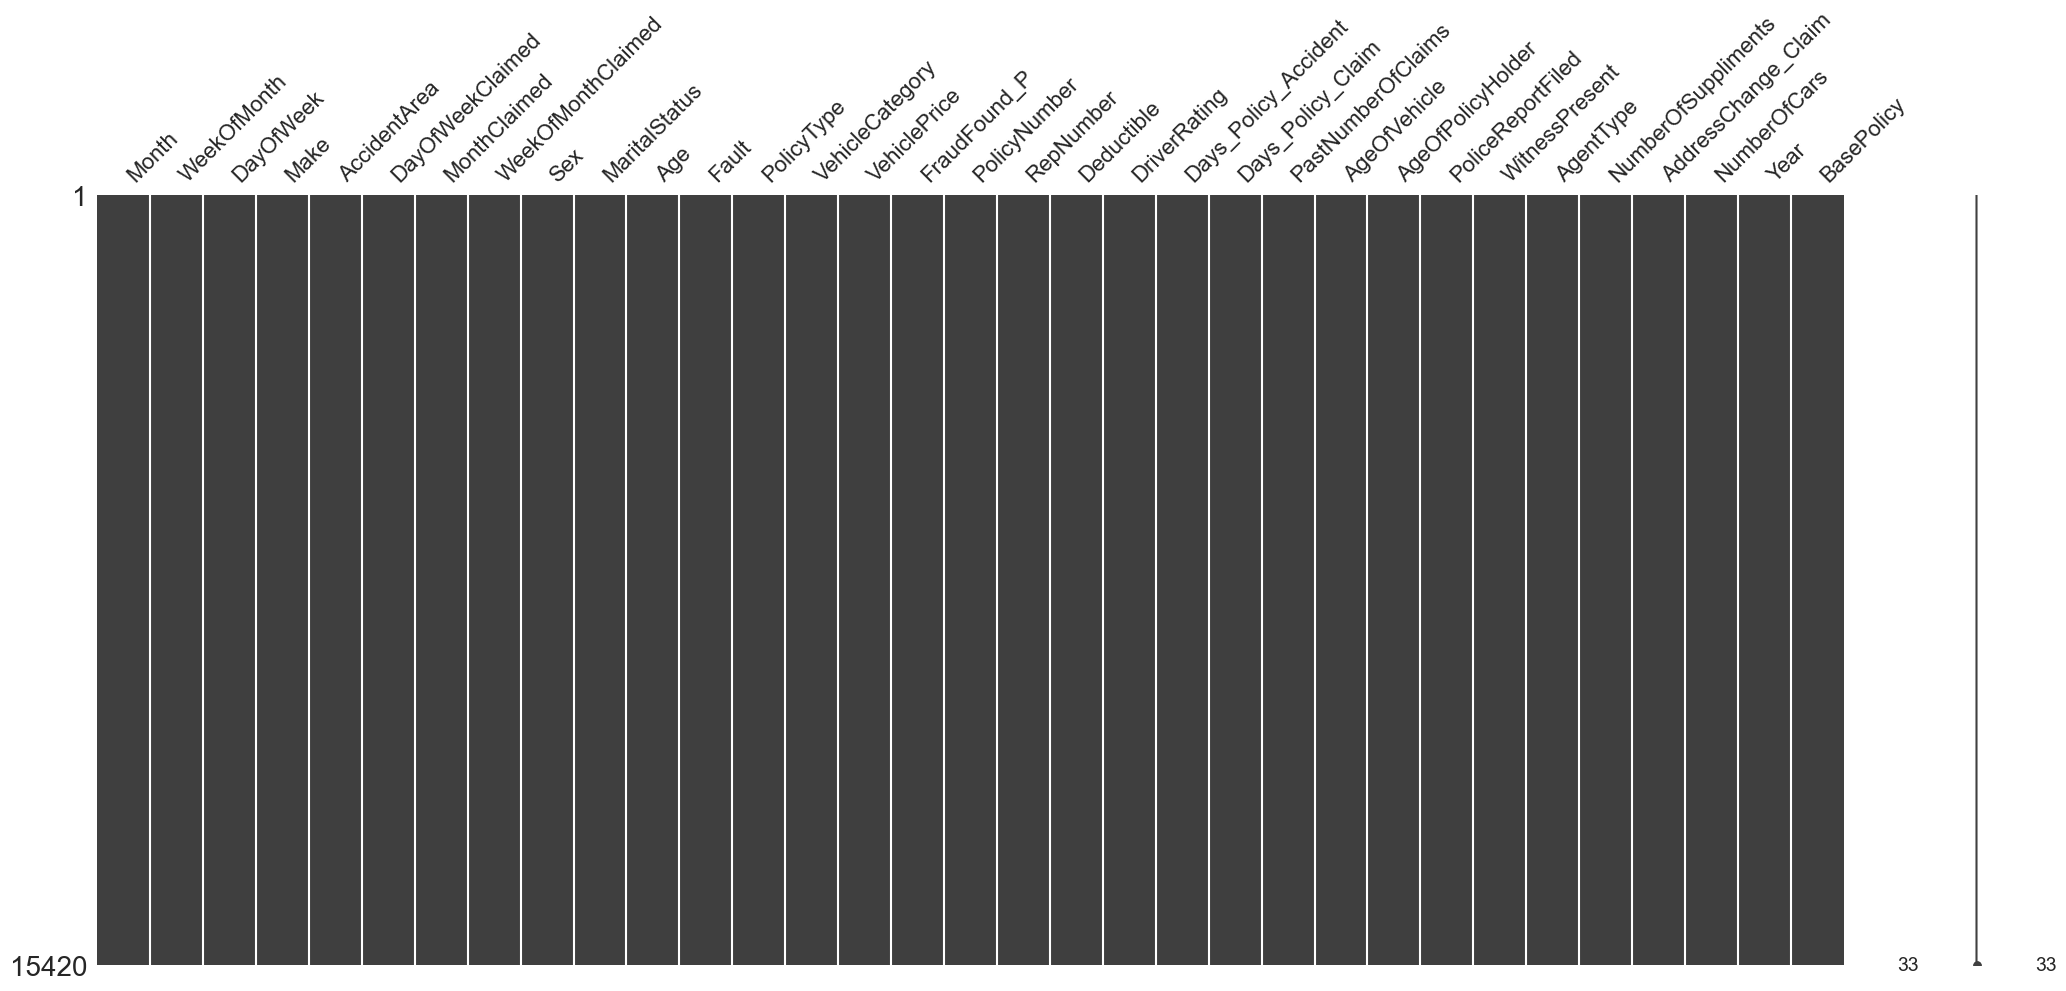

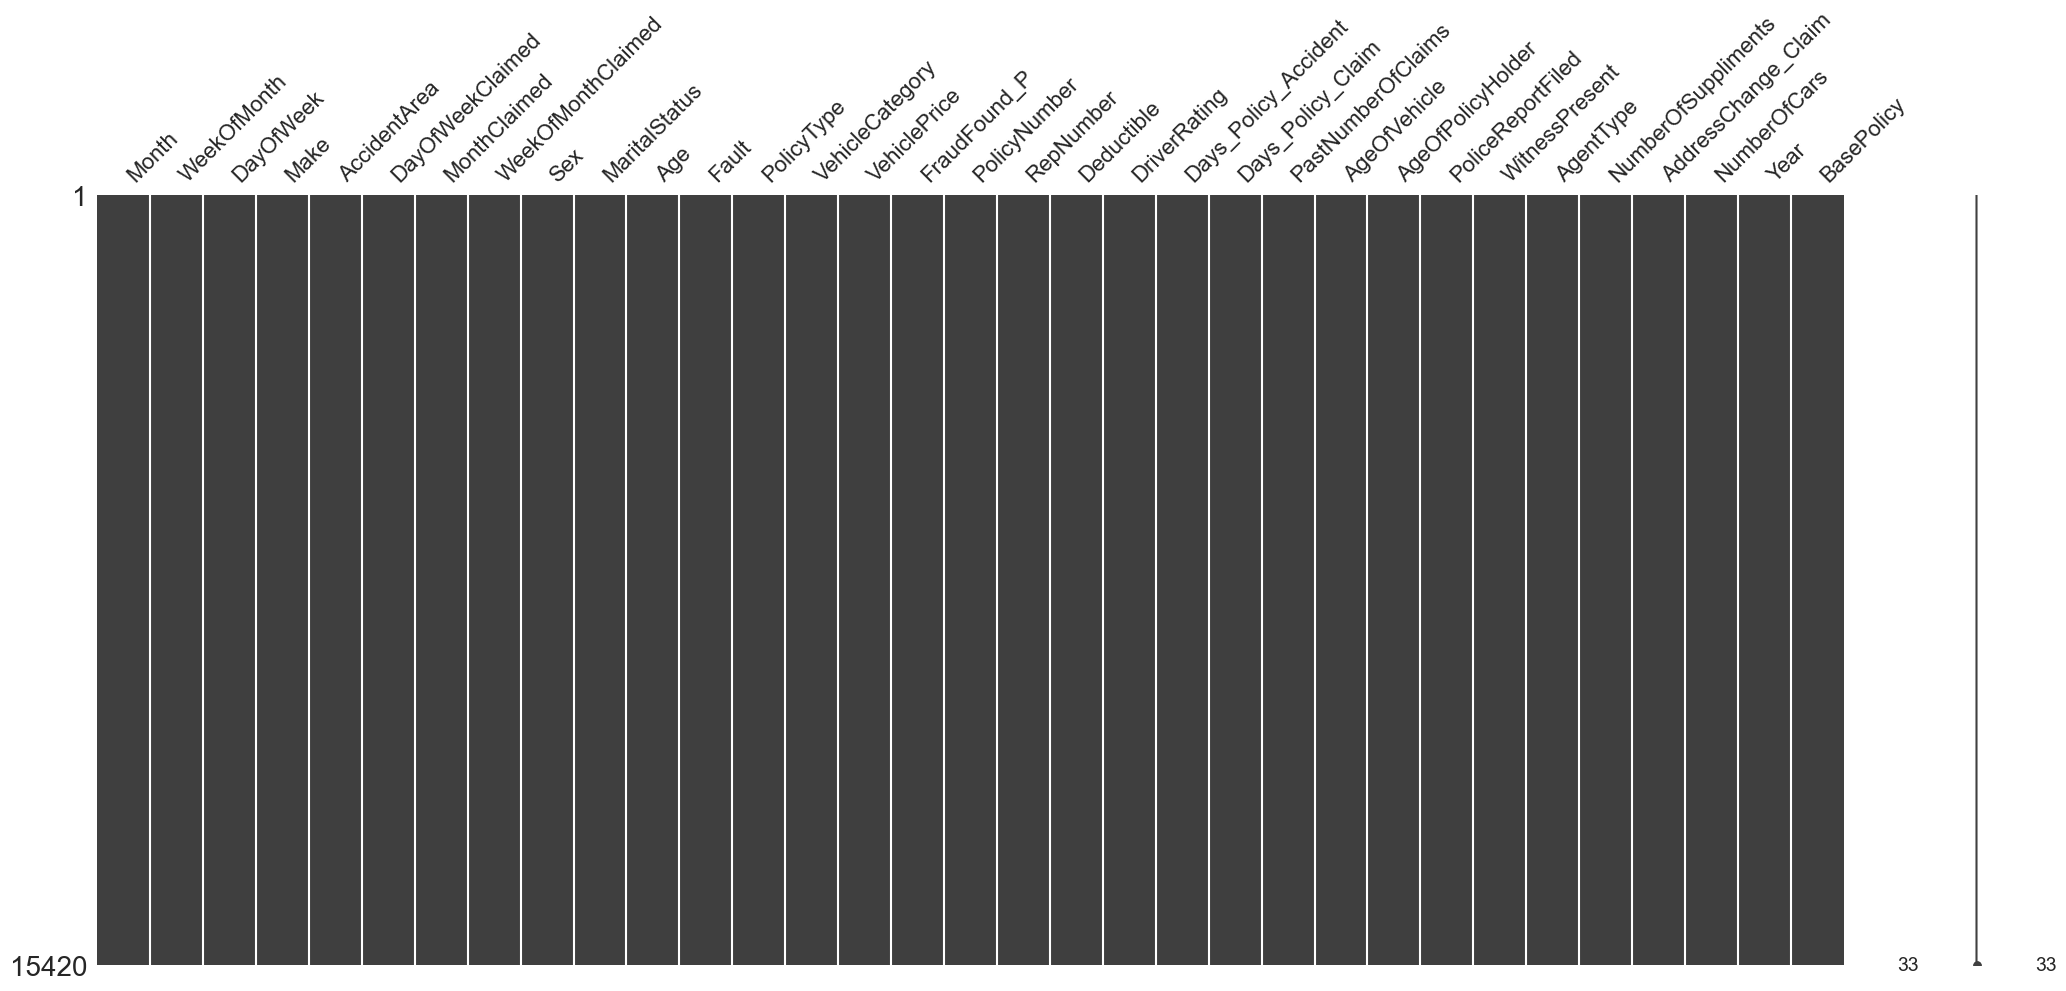

In [158]:
import missingno as msno
msno.matrix(fault_initial_dataset.isnull())
msno.matrix(fault_initial_dataset.isna())

Finding all the columns , including the Target value

In [159]:
fault_initial_dataset.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

Finding the target value counts , target column is Fault

In [160]:
fault_initial_dataset.Fault.value_counts()

Fault
Policy Holder    11230
Third Party       4190
Name: count, dtype: int64

<Axes: ylabel='count'>

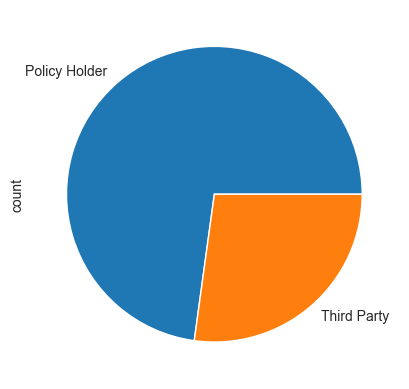

In [161]:
fault_initial_dataset.Fault.value_counts().plot(kind='pie')

Finding the data type in each column

In [162]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, roc_curve
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")

print("\nDataset Info:")
print(fault_initial_dataset.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P         

EDA

Data Exploration

        WeekOfMonth  WeekOfMonthClaimed           Age  FraudFound_P  \
count  15420.000000        15420.000000  15420.000000  15420.000000   
mean       2.788586            2.693969     39.855707      0.059857   
std        1.287585            1.259115     13.492377      0.237230   
min        1.000000            1.000000      0.000000      0.000000   
25%        2.000000            2.000000     31.000000      0.000000   
50%        3.000000            3.000000     38.000000      0.000000   
75%        4.000000            4.000000     48.000000      0.000000   
max        5.000000            5.000000     80.000000      1.000000   

       PolicyNumber     RepNumber    Deductible  DriverRating          Year  
count  15420.000000  15420.000000  15420.000000  15420.000000  15420.000000  
mean    7710.500000      8.483268    407.704280      2.487808   1994.866472  
std     4451.514911      4.599948     43.950998      1.119453      0.803313  
min        1.000000      1.000000    300.000000 

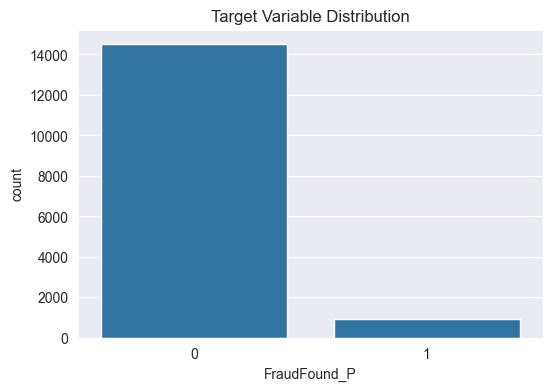

In [163]:
# Summary statistics
print(fault_initial_dataset.describe())

# Check target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='FraudFound_P', data=fault_initial_dataset)
plt.title("Target Variable Distribution")
plt.show()


In [164]:
fault_initial_dataset.FraudFound_P.value_counts()

FraudFound_P
0    14497
1      923
Name: count, dtype: int64

Visualizing Numeric Data

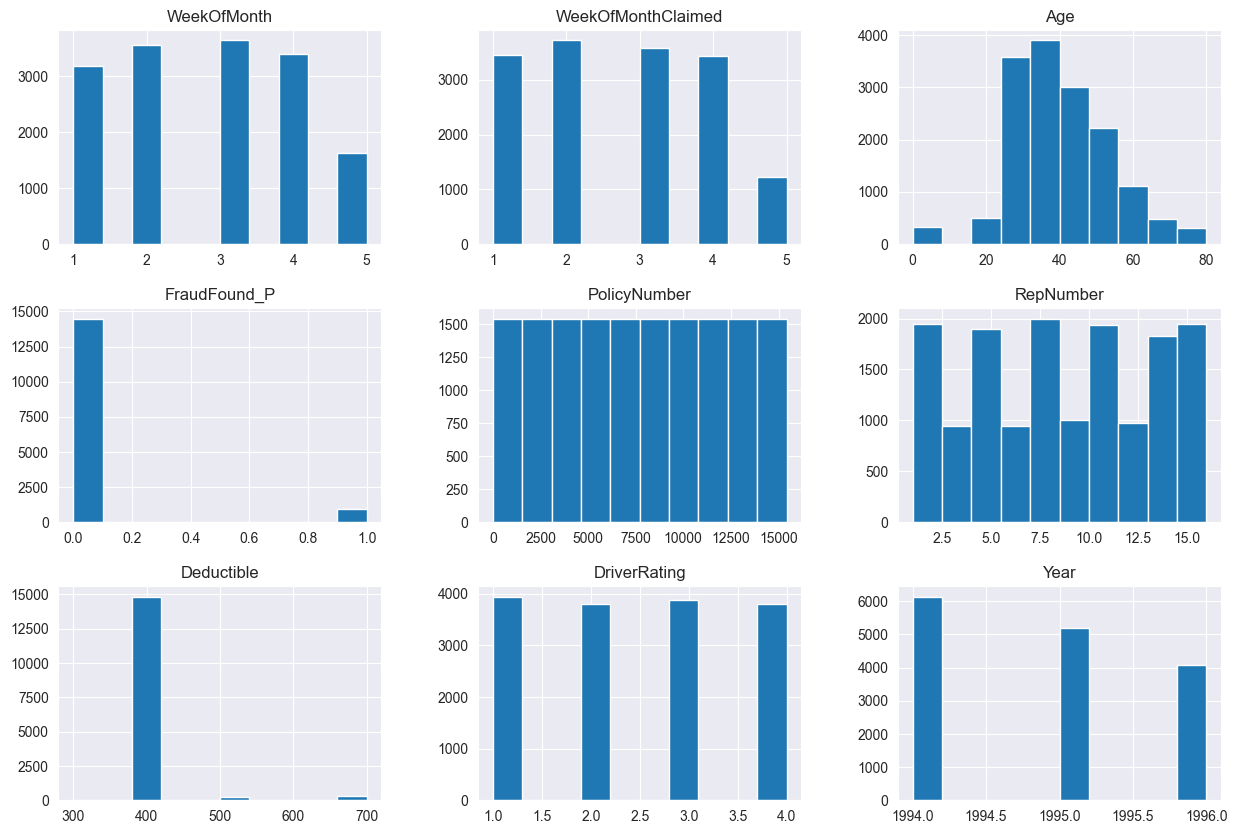

In [165]:
# Histogram of numeric features
fault_initial_dataset.hist(figsize=(15, 10))
plt.show()


Visualizing Categorical Data

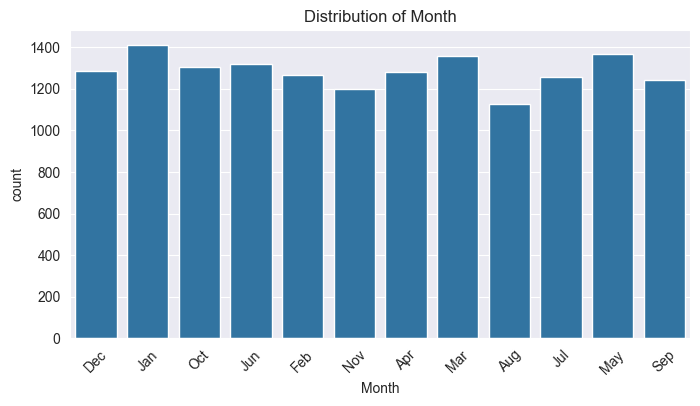

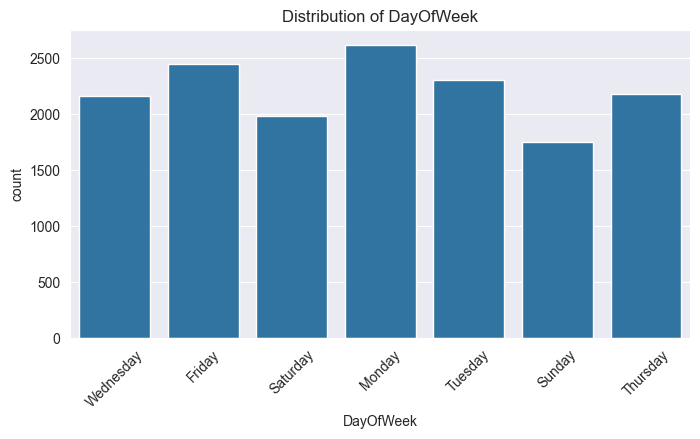

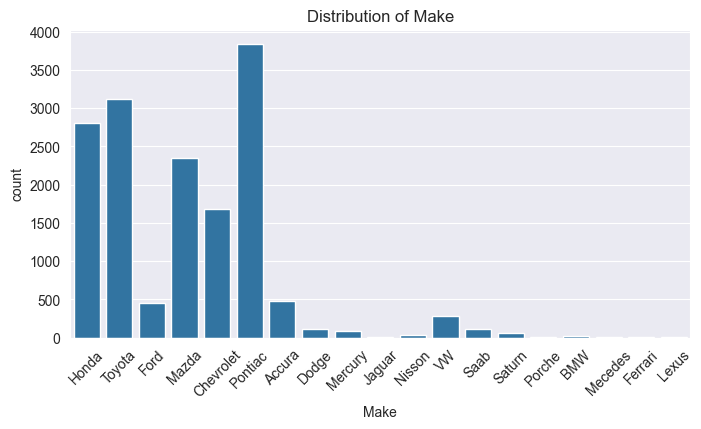

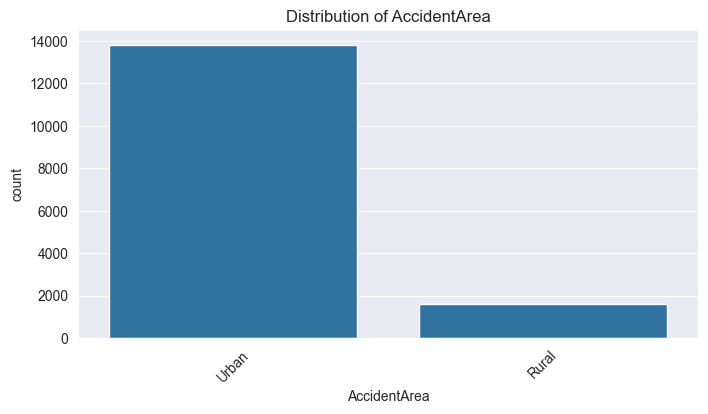

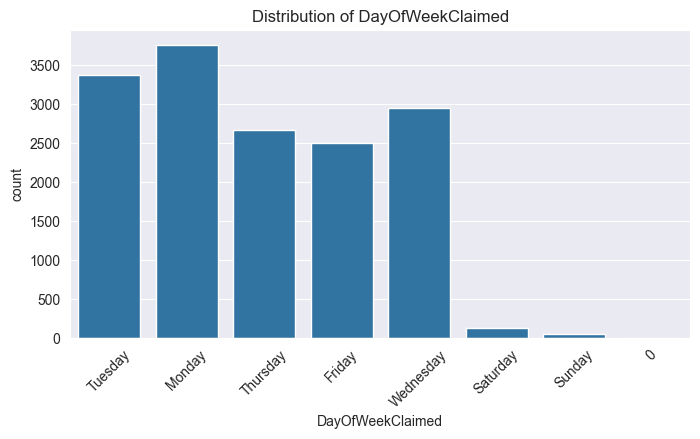

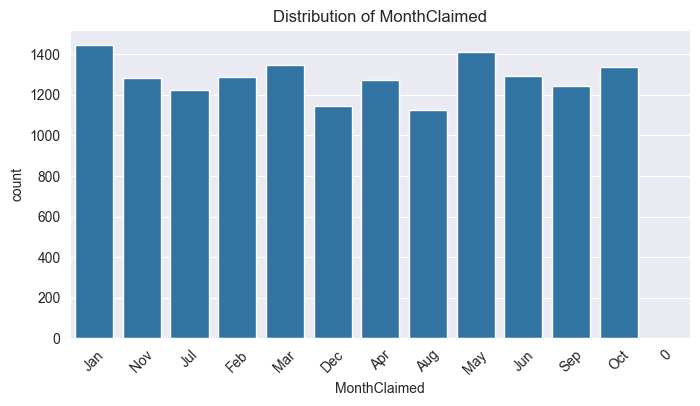

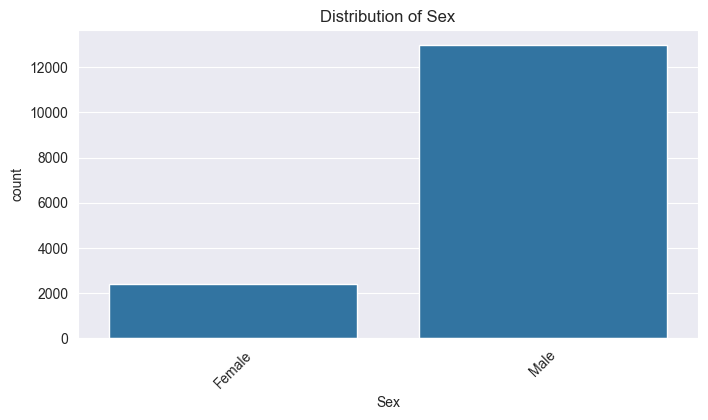

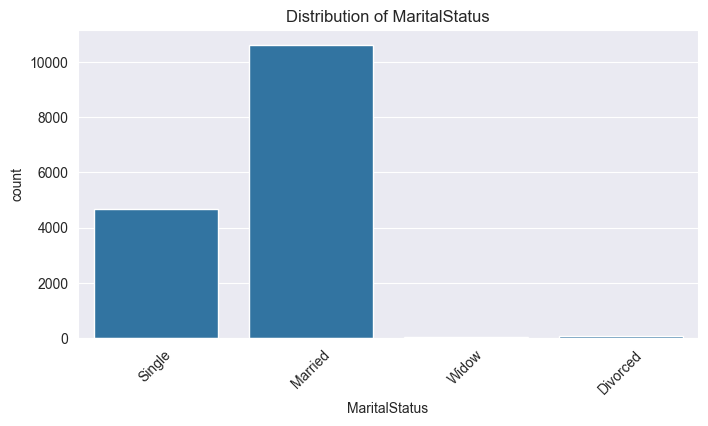

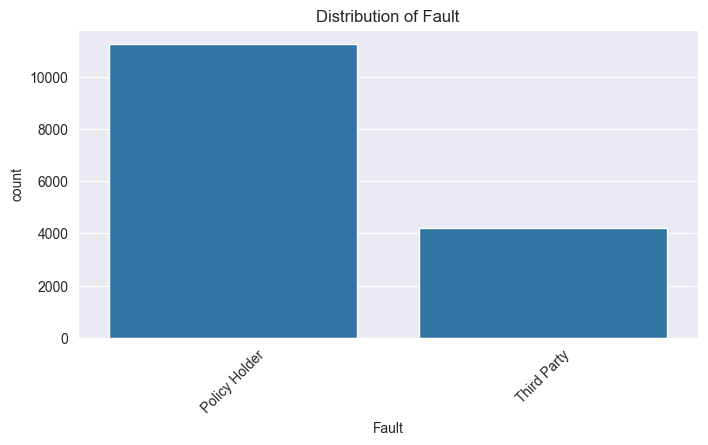

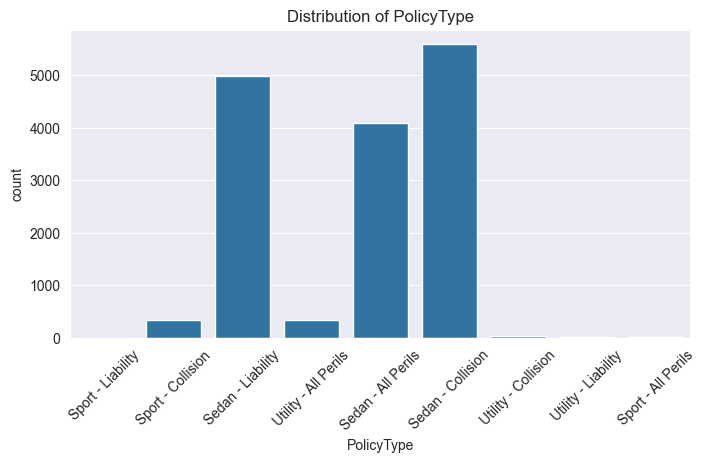

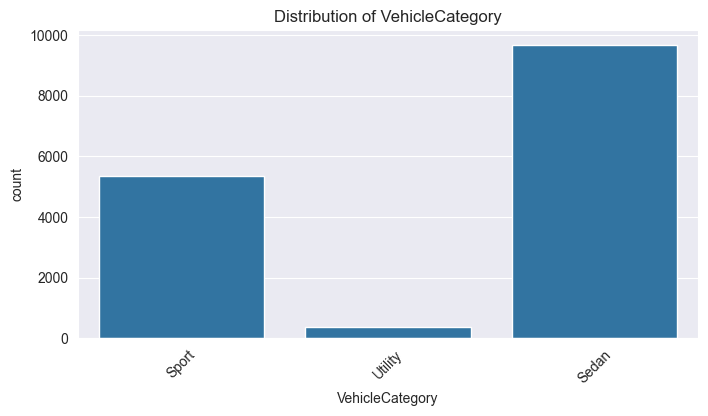

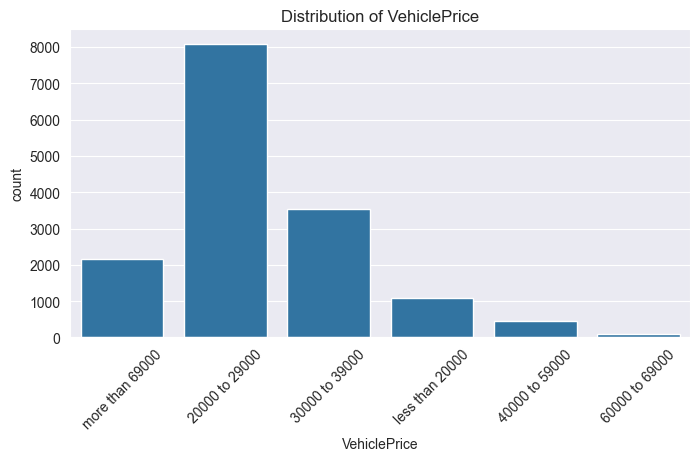

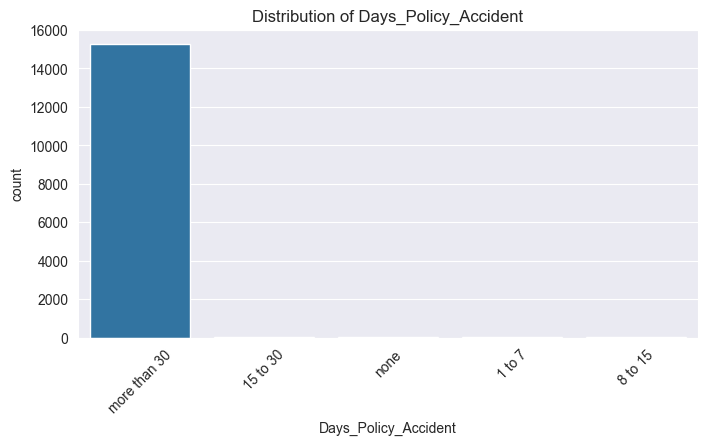

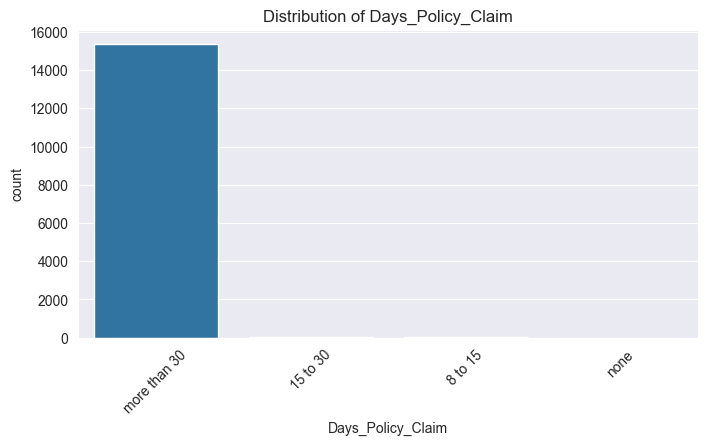

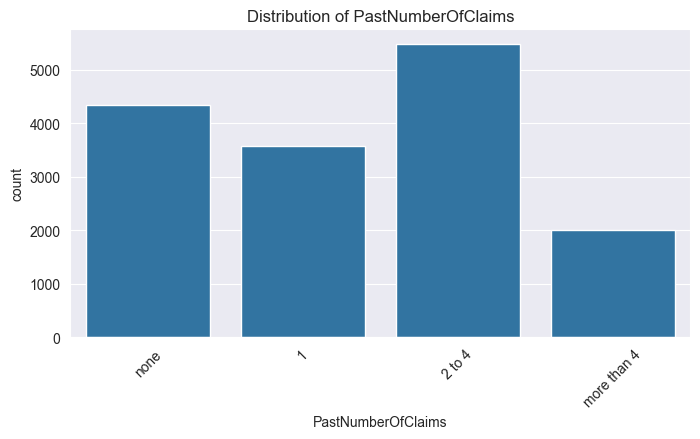

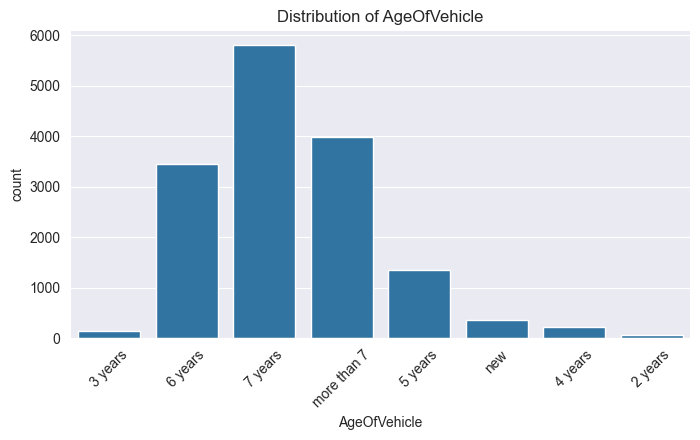

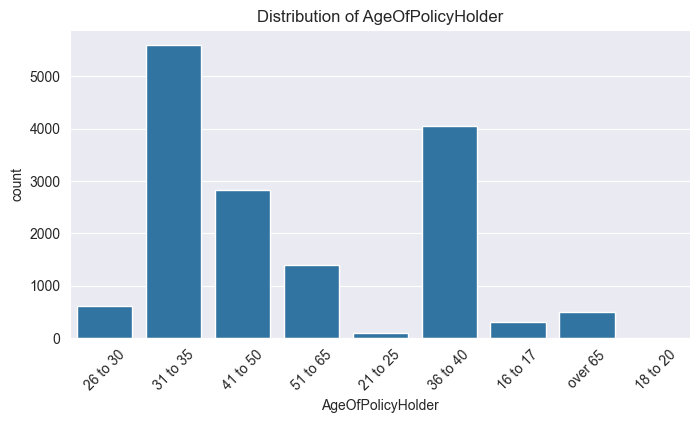

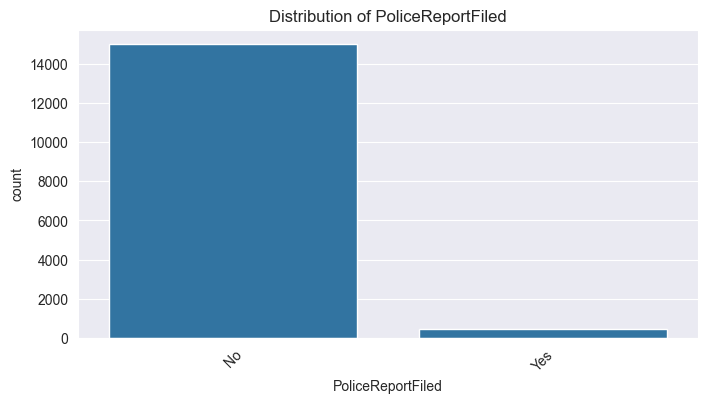

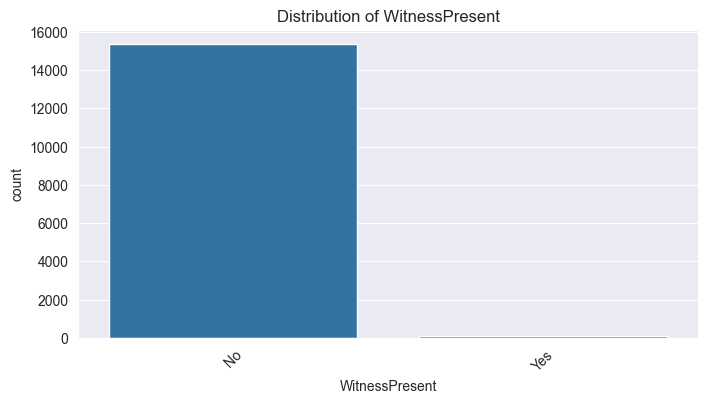

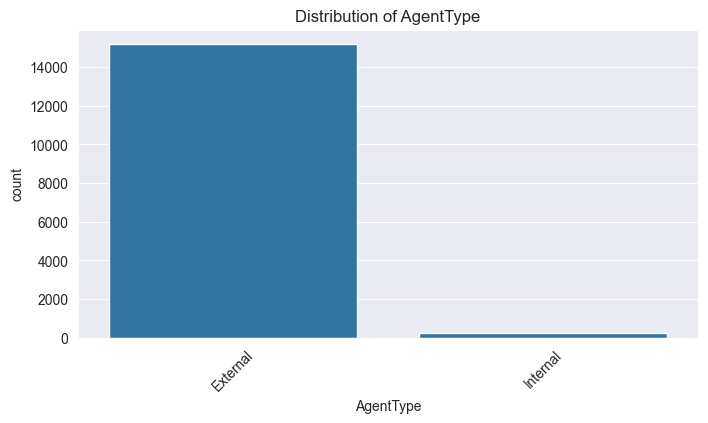

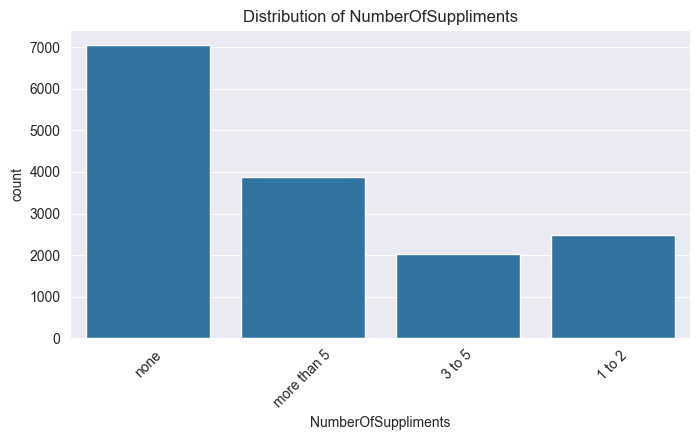

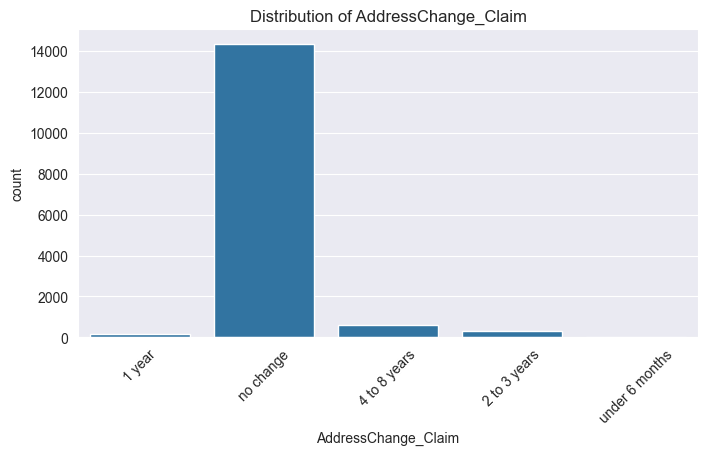

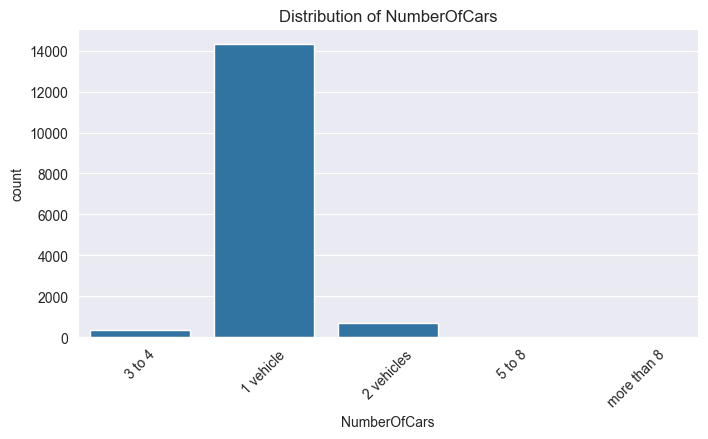

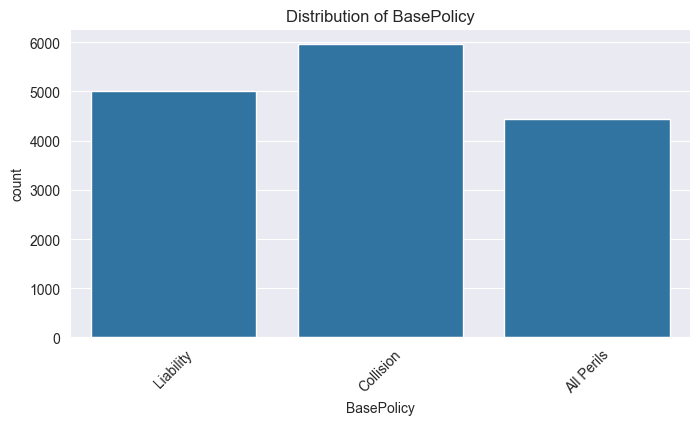

In [166]:
# Identify categorical features
categorical_columns = fault_initial_dataset.select_dtypes(include=['object']).columns
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=fault_initial_dataset)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()


Checking for non-Numerical data

In [167]:
fault_initial_dataset['FraudFound_P'].value_counts()

FraudFound_P
0    14497
1      923
Name: count, dtype: int64

In [168]:
fault_initial_dataset.nunique()

Month                      12
WeekOfMonth                 5
DayOfWeek                   7
Make                       19
AccidentArea                2
DayOfWeekClaimed            8
MonthClaimed               13
WeekOfMonthClaimed          5
Sex                         2
MaritalStatus               4
Age                        66
Fault                       2
PolicyType                  9
VehicleCategory             3
VehiclePrice                6
FraudFound_P                2
PolicyNumber            15420
RepNumber                  16
Deductible                  4
DriverRating                4
Days_Policy_Accident        5
Days_Policy_Claim           4
PastNumberOfClaims          4
AgeOfVehicle                8
AgeOfPolicyHolder           9
PoliceReportFiled           2
WitnessPresent              2
AgentType                   2
NumberOfSuppliments         4
AddressChange_Claim         5
NumberOfCars                5
Year                        3
BasePolicy                  3
dtype: int

In [169]:
# Gender and marital status of the accident victims (consider with all years)
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
df_sex_maritalstatus = fault_initial_dataset.groupby(["Sex", "MaritalStatus"]).agg({"Sex":"count"})
df_sex_maritalstatus.columns = ["Counts"]
df_sex_maritalstatus.reset_index(inplace=True)
print(df_sex_maritalstatus.head(10))


fig = px.bar(df_sex_maritalstatus, x="Sex", y="Counts",
             color='MaritalStatus', barmode='group',
             height=400,
            title = "Gender and marital status of the accident victims")
fig.show()

      Sex MaritalStatus  Counts
0  Female      Divorced      40
1  Female       Married    1325
2  Female        Single    1031
3  Female         Widow      24
4    Male      Divorced      36
5    Male       Married    9300
6    Male        Single    3653
7    Male         Widow      11


In [170]:
df_make_vehicle_age = fault_initial_dataset.groupby(["Make", "AgeOfVehicle"]).agg({"Make":"count"})
df_make_vehicle_age.columns = ["Counts"]
df_make_vehicle_age.reset_index(inplace=True)
print(df_make_vehicle_age.head(10))
print("------------------------------------------------------------")
print("Car Brands: ")
print(df_make_vehicle_age["Make"].unique())
# Ages of vehicles involved in the accident by car brands  (consider with all years)

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=df_make_vehicle_age["AgeOfVehicle"],
                     values=df_make_vehicle_age.loc[df_make_vehicle_age["Make"] == "Accura"]["Counts"],
                     name="Accura"),
              1, 1)
fig.add_trace(go.Pie(labels=df_make_vehicle_age["AgeOfVehicle"],
                     values=df_make_vehicle_age.loc[df_make_vehicle_age["Make"] == "BMW"]["Counts"],
                     name="BMW"),
              1, 2)
fig.add_trace(go.Pie(labels=df_make_vehicle_age["AgeOfVehicle"],
                     values=df_make_vehicle_age.loc[df_make_vehicle_age["Make"] == "Chevrolet"]["Counts"],
                     name="Chevrolet"),
              1, 3)
# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Ages of vehicles involved in the accident by car brands",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Accura', x=0.12, y=0.5, font_size=10, showarrow=False),
                 dict(text='BMW', x=0.50, y=0.5, font_size=10, showarrow=False),
                dict(text='Chevrolet', x=0.89, y=0.5, font_size=10, showarrow=False)])
fig.show()

     Make AgeOfVehicle  Counts
0  Accura      2 years       1
1  Accura      3 years       2
2  Accura      4 years       1
3  Accura      5 years      19
4  Accura      6 years      68
5  Accura      7 years     226
6  Accura  more than 7     155
7     BMW      2 years       1
8     BMW      5 years       1
9     BMW      6 years       2
------------------------------------------------------------
Car Brands: 
['Accura' 'BMW' 'Chevrolet' 'Dodge' 'Ferrari' 'Ford' 'Honda' 'Jaguar'
 'Lexus' 'Mazda' 'Mecedes' 'Mercury' 'Nisson' 'Pontiac' 'Porche' 'Saab'
 'Saturn' 'Toyota' 'VW']


In [171]:
# Ages of vehicles involved in the accident by car brands  (consider with all years)

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=df_make_vehicle_age["AgeOfVehicle"],
                     values=df_make_vehicle_age.loc[df_make_vehicle_age["Make"] == "Ferrari"]["Counts"],
                     name="Ferrari"),
              1, 1)
fig.add_trace(go.Pie(labels=df_make_vehicle_age["AgeOfVehicle"],
                     values=df_make_vehicle_age.loc[df_make_vehicle_age["Make"] == "Ford"]["Counts"],
                     name="Ford"),
              1, 2)
fig.add_trace(go.Pie(labels=df_make_vehicle_age["AgeOfVehicle"],
                     values=df_make_vehicle_age.loc[df_make_vehicle_age["Make"] == "Toyota"]["Counts"],
                     name="Toyota"),
              1, 3)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Ages of vehicles involved in the accident by car brands",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Ferrari', x=0.12, y=0.5, font_size=10, showarrow=False),
                 dict(text='Ford', x=0.50, y=0.5, font_size=10, showarrow=False),
                dict(text='Toyota', x=0.88, y=0.5, font_size=10, showarrow=False)])
fig.show()

In [172]:
# Regions where accidents occurred by years
df_area_year = fault_initial_dataset.groupby(["AccidentArea", "Year"]).agg({"AccidentArea":"count"})
df_area_year.columns = ["Counts"]
df_area_year.reset_index(inplace=True)
print(df_area_year.head(10))


fig = px.bar(df_area_year, x="Year", y="Counts",
             color='AccidentArea', barmode='group',
             height=400,
            title = "Regions where accidents occurred by year")
fig.show()

  AccidentArea  Year  Counts
0        Rural  1994     642
1        Rural  1995     536
2        Rural  1996     420
3        Urban  1994    5500
4        Urban  1995    4659
5        Urban  1996    3663


In [173]:
# Check the data types of all columns
print(fault_initial_dataset.dtypes)

# Alternatively, identify non-numeric columns explicitly
non_numeric_columns = fault_initial_dataset.select_dtypes(include=['object', 'category']).columns
print(f"Non-Numeric Columns: {non_numeric_columns}")


Month                   object
WeekOfMonth              int64
DayOfWeek               object
Make                    object
AccidentArea            object
DayOfWeekClaimed        object
MonthClaimed            object
WeekOfMonthClaimed       int64
Sex                     object
MaritalStatus           object
Age                      int64
Fault                   object
PolicyType              object
VehicleCategory         object
VehiclePrice            object
FraudFound_P             int64
PolicyNumber             int64
RepNumber                int64
Deductible               int64
DriverRating             int64
Days_Policy_Accident    object
Days_Policy_Claim       object
PastNumberOfClaims      object
AgeOfVehicle            object
AgeOfPolicyHolder       object
PoliceReportFiled       object
WitnessPresent          object
AgentType               object
NumberOfSuppliments     object
AddressChange_Claim     object
NumberOfCars            object
Year                     int64
BasePoli

printing all the unique values in the non-numerical data

In [174]:
# Loop through all non-numeric columns and print their unique values
for col in non_numeric_columns:
    print(f"Unique values in column '{col}':")
    print(fault_initial_dataset[col].unique())
    print("-" * 50)


Unique values in column 'Month':
['Dec' 'Jan' 'Oct' 'Jun' 'Feb' 'Nov' 'Apr' 'Mar' 'Aug' 'Jul' 'May' 'Sep']
--------------------------------------------------
Unique values in column 'DayOfWeek':
['Wednesday' 'Friday' 'Saturday' 'Monday' 'Tuesday' 'Sunday' 'Thursday']
--------------------------------------------------
Unique values in column 'Make':
['Honda' 'Toyota' 'Ford' 'Mazda' 'Chevrolet' 'Pontiac' 'Accura' 'Dodge'
 'Mercury' 'Jaguar' 'Nisson' 'VW' 'Saab' 'Saturn' 'Porche' 'BMW' 'Mecedes'
 'Ferrari' 'Lexus']
--------------------------------------------------
Unique values in column 'AccidentArea':
['Urban' 'Rural']
--------------------------------------------------
Unique values in column 'DayOfWeekClaimed':
['Tuesday' 'Monday' 'Thursday' 'Friday' 'Wednesday' 'Saturday' 'Sunday'
 '0']
--------------------------------------------------
Unique values in column 'MonthClaimed':
['Jan' 'Nov' 'Jul' 'Feb' 'Mar' 'Dec' 'Apr' 'Aug' 'May' 'Jun' 'Sep' 'Oct'
 '0']
------------------------------

In [175]:
for col in fault_initial_dataset:
    print(f"unique values in column '{col}':")
    print(fault_initial_dataset[col].unique())
    print("-" * 50)

unique values in column 'Month':
['Dec' 'Jan' 'Oct' 'Jun' 'Feb' 'Nov' 'Apr' 'Mar' 'Aug' 'Jul' 'May' 'Sep']
--------------------------------------------------
unique values in column 'WeekOfMonth':
[5 3 2 4 1]
--------------------------------------------------
unique values in column 'DayOfWeek':
['Wednesday' 'Friday' 'Saturday' 'Monday' 'Tuesday' 'Sunday' 'Thursday']
--------------------------------------------------
unique values in column 'Make':
['Honda' 'Toyota' 'Ford' 'Mazda' 'Chevrolet' 'Pontiac' 'Accura' 'Dodge'
 'Mercury' 'Jaguar' 'Nisson' 'VW' 'Saab' 'Saturn' 'Porche' 'BMW' 'Mecedes'
 'Ferrari' 'Lexus']
--------------------------------------------------
unique values in column 'AccidentArea':
['Urban' 'Rural']
--------------------------------------------------
unique values in column 'DayOfWeekClaimed':
['Tuesday' 'Monday' 'Thursday' 'Friday' 'Wednesday' 'Saturday' 'Sunday'
 '0']
--------------------------------------------------
unique values in column 'MonthClaimed':
['Jan' 

Ordinal Columns with Natural Order - VehiclePrice,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder

moving to new dataset

In [176]:
Transformed_dataset = fault_initial_dataset.copy()
Transformed_dataset.tail()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils
15419,Dec,2,Wednesday,Toyota,Urban,Thursday,Dec,3,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision


In [177]:
for col in Transformed_dataset:
    print(f"Transformed column '{col}':")
    print(Transformed_dataset[col].unique())
    print("-" * 50)

Transformed column 'Month':
['Dec' 'Jan' 'Oct' 'Jun' 'Feb' 'Nov' 'Apr' 'Mar' 'Aug' 'Jul' 'May' 'Sep']
--------------------------------------------------
Transformed column 'WeekOfMonth':
[5 3 2 4 1]
--------------------------------------------------
Transformed column 'DayOfWeek':
['Wednesday' 'Friday' 'Saturday' 'Monday' 'Tuesday' 'Sunday' 'Thursday']
--------------------------------------------------
Transformed column 'Make':
['Honda' 'Toyota' 'Ford' 'Mazda' 'Chevrolet' 'Pontiac' 'Accura' 'Dodge'
 'Mercury' 'Jaguar' 'Nisson' 'VW' 'Saab' 'Saturn' 'Porche' 'BMW' 'Mecedes'
 'Ferrari' 'Lexus']
--------------------------------------------------
Transformed column 'AccidentArea':
['Urban' 'Rural']
--------------------------------------------------
Transformed column 'DayOfWeekClaimed':
['Tuesday' 'Monday' 'Thursday' 'Friday' 'Wednesday' 'Saturday' 'Sunday'
 '0']
--------------------------------------------------
Transformed column 'MonthClaimed':
['Jan' 'Nov' 'Jul' 'Feb' 'Mar' 'Dec' 'Apr'

In [178]:
# Check the data types of all columns
print(Transformed_dataset.dtypes)

# Alternatively, identify non-numeric columns explicitly
non_numeric_columns_trasformed_datset = Transformed_dataset.select_dtypes(include=['object', 'category']).columns
print(f"Non-Numeric Columns: {non_numeric_columns_trasformed_datset}")


Month                   object
WeekOfMonth              int64
DayOfWeek               object
Make                    object
AccidentArea            object
DayOfWeekClaimed        object
MonthClaimed            object
WeekOfMonthClaimed       int64
Sex                     object
MaritalStatus           object
Age                      int64
Fault                   object
PolicyType              object
VehicleCategory         object
VehiclePrice            object
FraudFound_P             int64
PolicyNumber             int64
RepNumber                int64
Deductible               int64
DriverRating             int64
Days_Policy_Accident    object
Days_Policy_Claim       object
PastNumberOfClaims      object
AgeOfVehicle            object
AgeOfPolicyHolder       object
PoliceReportFiled       object
WitnessPresent          object
AgentType               object
NumberOfSuppliments     object
AddressChange_Claim     object
NumberOfCars            object
Year                     int64
BasePoli

In [179]:
for col in non_numeric_columns_trasformed_datset:
    print(f"Unique values in column '{col}':")
    print(Transformed_dataset[col].unique())
    print("-" * 50)

Unique values in column 'Month':
['Dec' 'Jan' 'Oct' 'Jun' 'Feb' 'Nov' 'Apr' 'Mar' 'Aug' 'Jul' 'May' 'Sep']
--------------------------------------------------
Unique values in column 'DayOfWeek':
['Wednesday' 'Friday' 'Saturday' 'Monday' 'Tuesday' 'Sunday' 'Thursday']
--------------------------------------------------
Unique values in column 'Make':
['Honda' 'Toyota' 'Ford' 'Mazda' 'Chevrolet' 'Pontiac' 'Accura' 'Dodge'
 'Mercury' 'Jaguar' 'Nisson' 'VW' 'Saab' 'Saturn' 'Porche' 'BMW' 'Mecedes'
 'Ferrari' 'Lexus']
--------------------------------------------------
Unique values in column 'AccidentArea':
['Urban' 'Rural']
--------------------------------------------------
Unique values in column 'DayOfWeekClaimed':
['Tuesday' 'Monday' 'Thursday' 'Friday' 'Wednesday' 'Saturday' 'Sunday'
 '0']
--------------------------------------------------
Unique values in column 'MonthClaimed':
['Jan' 'Nov' 'Jul' 'Feb' 'Mar' 'Dec' 'Apr' 'Aug' 'May' 'Jun' 'Sep' 'Oct'
 '0']
------------------------------

In [180]:
Make_mapping = {'Honda': 0, 'Toyota': 1, 'Ford': 2, 'Mazda': 3, 'Chevrolet': 4, 'Pontiac': 5, 'Accura': 6,'Dodge': 7,
 'Mercury': 8, 'Jaguar':9, 'Nisson':10,'VW':11, 'Saab':12, 'Saturn':13, 'Porche':14, 'BMW':15, 'Mecedes':16,
 'Ferrari':17, 'Lexus':18}
DayOfWeek_mapping = {'Thursday': 0, 'Monday': 1, 'Sunday': 2, 'Tuesday': 3, 'Friday': 4, 'Wednesday': 5, 'Saturday': 6}
Month_mapping = {'Dec':0, 'Jan':1, 'Oct':2, 'Jun':3, 'Feb':4, 'Nov':5, 'Apr':6, 'Mar':7, 'Aug':8, 'Jul':9, 'May':10, 'Sep':11}
AccidentArea_mapping = {'Urban':0, 'Rural':1}
Sex_mapping = {'Female':0, 'Male':1}
MaritalStatus_mapping = {'Single':0, 'Married':1, 'Widow':2, 'Divorced':3}
Fault_mapping = {'Policy Holder':0, 'Third Party':1}
VehicleCategory_mapping = {'Sport':0, 'Utility':1, 'Sedan':2}
PoliceReportFiled_mapping = {'No':0, 'Yes':1}
WitnessPresent_mapping = {'Yes':0, 'No':1}
AgentType_mapping = {'External':1, 'Internal':0}

In [181]:
# Apply mapping to each respective column
Transformed_dataset['DayOfWeek'] = Transformed_dataset['DayOfWeek'].map(DayOfWeek_mapping)
Transformed_dataset['Make'] = Transformed_dataset['Make'].map(Make_mapping)
Transformed_dataset['Month'] = Transformed_dataset['Month'].map(Month_mapping)
Transformed_dataset['AccidentArea'] = Transformed_dataset['AccidentArea'].map(AccidentArea_mapping)
Transformed_dataset['Sex'] = Transformed_dataset['Sex'].map(Sex_mapping)
Transformed_dataset['MaritalStatus'] = Transformed_dataset['MaritalStatus'].map(MaritalStatus_mapping)
Transformed_dataset['Fault'] = Transformed_dataset['Fault'].map(Fault_mapping)
Transformed_dataset['VehicleCategory'] = Transformed_dataset['VehicleCategory'].map(VehicleCategory_mapping)
Transformed_dataset['PoliceReportFiled'] = Transformed_dataset['PoliceReportFiled'].map(PoliceReportFiled_mapping)
Transformed_dataset['WitnessPresent'] = Transformed_dataset['WitnessPresent'].map(WitnessPresent_mapping)
Transformed_dataset['AgentType'] = Transformed_dataset['AgentType'].map(AgentType_mapping)

# Display the resulting DataFrame
print(Transformed_dataset.head())

   Month  WeekOfMonth  DayOfWeek  Make  AccidentArea DayOfWeekClaimed  \
0      0            5          5     0             0          Tuesday   
1      1            3          5     0             0           Monday   
2      2            5          4     0             0         Thursday   
3      3            2          6     1             1           Friday   
4      1            5          1     0             0          Tuesday   

  MonthClaimed  WeekOfMonthClaimed  Sex  MaritalStatus  ...  AgeOfVehicle  \
0          Jan                   1    0              0  ...       3 years   
1          Jan                   4    1              0  ...       6 years   
2          Nov                   2    1              1  ...       7 years   
3          Jul                   1    1              1  ...   more than 7   
4          Feb                   2    0              0  ...       5 years   

   AgeOfPolicyHolder PoliceReportFiled  WitnessPresent AgentType  \
0           26 to 30          

In [182]:
print(Transformed_dataset.columns)

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')


In [183]:
Transformed_dataset.shape

(15420, 33)

In [184]:
new_dataset = Transformed_dataset.copy()

In [185]:
new_dataset = new_dataset.drop(columns=['AddressChange_Claim','NumberOfCars',
'BasePolicy'])

In [186]:
new_dataset = new_dataset.drop(columns=['NumberOfSuppliments','AgeOfPolicyHolder',
'Days_Policy_Claim','AgeOfVehicle','PastNumberOfClaims','Days_Policy_Accident','VehiclePrice','PolicyType','DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed','PolicyNumber', 'RepNumber' ])

In [187]:
new_dataset.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'VehicleCategory', 'FraudFound_P',
       'Deductible', 'DriverRating', 'PoliceReportFiled', 'WitnessPresent',
       'AgentType', 'Year'],
      dtype='object')

In [188]:
new_dataset.shape

(15420, 17)

In [189]:
for col in new_dataset:
    print(f"new dataset '{col}':")
    print(new_dataset[col].unique())
    print("-" * 50)

new dataset 'Month':
[ 0  1  2  3  4  5  6  7  8  9 10 11]
--------------------------------------------------
new dataset 'WeekOfMonth':
[5 3 2 4 1]
--------------------------------------------------
new dataset 'DayOfWeek':
[5 4 6 1 3 2 0]
--------------------------------------------------
new dataset 'Make':
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
--------------------------------------------------
new dataset 'AccidentArea':
[0 1]
--------------------------------------------------
new dataset 'Sex':
[0 1]
--------------------------------------------------
new dataset 'MaritalStatus':
[0 1 2 3]
--------------------------------------------------
new dataset 'Age':
[21 34 47 65 27 20 36  0 30 42 71 52 28 61 38 41 32 40 63 31 45 60 39 55
 35 44 72 29 37 59 49 50 26 48 64 33 74 23 25 56 16 68 18 51 22 53 46 43
 57 54 69 67 19 78 77 75 80 58 73 24 76 62 79 70 17 66]
--------------------------------------------------
new dataset 'Fault':
[0 1]
----------------------------

verify the conversion

In [190]:
# Verify all columns are numeric
print(new_dataset.dtypes)

# Check for missing values
print("Missing Values After Encoding:")
print(new_dataset.isnull().sum())


Month                int64
WeekOfMonth          int64
DayOfWeek            int64
Make                 int64
AccidentArea         int64
Sex                  int64
MaritalStatus        int64
Age                  int64
Fault                int64
VehicleCategory      int64
FraudFound_P         int64
Deductible           int64
DriverRating         int64
PoliceReportFiled    int64
WitnessPresent       int64
AgentType            int64
Year                 int64
dtype: object
Missing Values After Encoding:
Month                0
WeekOfMonth          0
DayOfWeek            0
Make                 0
AccidentArea         0
Sex                  0
MaritalStatus        0
Age                  0
Fault                0
VehicleCategory      0
FraudFound_P         0
Deductible           0
DriverRating         0
PoliceReportFiled    0
WitnessPresent       0
AgentType            0
Year                 0
dtype: int64


Correlation matrix

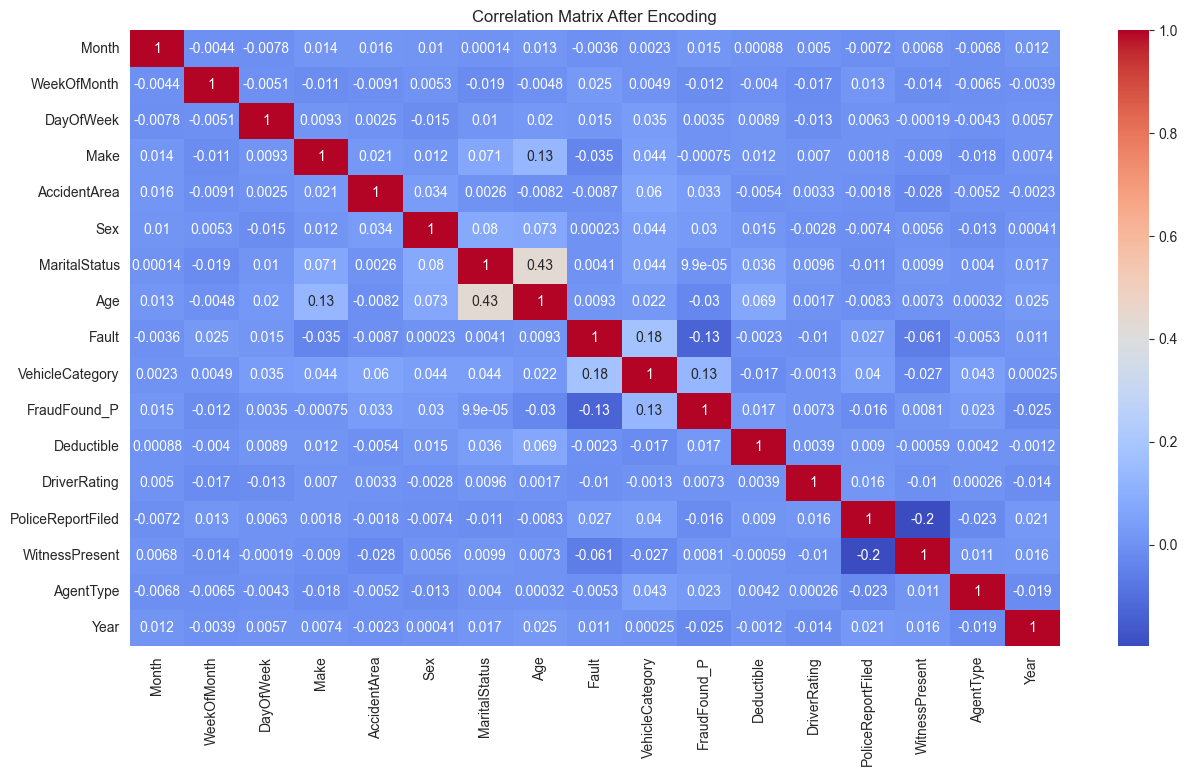

In [191]:
# Correlation matrix
plt.figure(figsize=(15, 8))
sns.heatmap(new_dataset.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix After Encoding")
plt.show()


In [192]:
new_dataset.FraudFound_P.value_counts()

FraudFound_P
0    14497
1      923
Name: count, dtype: int64

<Axes: xlabel='FraudFound_P', ylabel='count'>

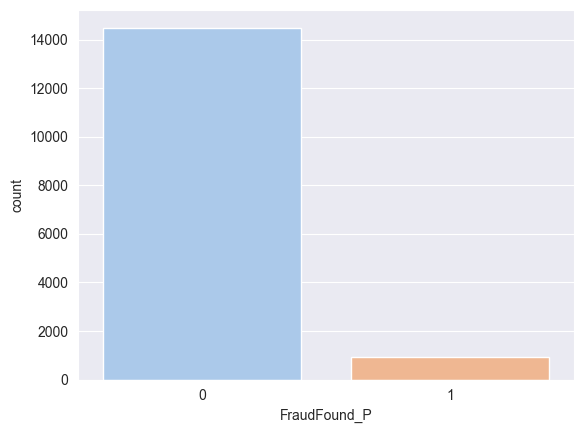

In [193]:
import seaborn as sns
sns.countplot(x='FraudFound_P',data=new_dataset,palette="pastel")

EDA

In [194]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the target variable 'y' and features 'X'
y = new_dataset['FraudFound_P']
X = new_dataset.drop('FraudFound_P', axis=1)

# Descriptive statistics for numerical features in X
print("Descriptive Statistics for Numerical Features in X:")
print(X.describe())

Descriptive Statistics for Numerical Features in X:
              Month   WeekOfMonth     DayOfWeek          Make  AccidentArea  \
count  15420.000000  15420.000000  15420.000000  15420.000000  15420.000000   
mean       5.440467      2.788586      2.948962      3.059598      0.103632   
std        3.471268      1.287585      1.983210      2.566809      0.304792   
min        0.000000      1.000000      0.000000      0.000000      0.000000   
25%        2.000000      2.000000      1.000000      1.000000      0.000000   
50%        5.000000      3.000000      3.000000      3.000000      0.000000   
75%        9.000000      4.000000      5.000000      5.000000      0.000000   
max       11.000000      5.000000      6.000000     18.000000      1.000000   

                Sex  MaritalStatus           Age         Fault  \
count  15420.000000   15420.000000  15420.000000  15420.000000   
mean       0.843061       0.708366     39.855707      0.271725   
std        0.363755       0.490623    

In [195]:
print("\nNull Values in X:")
print(X.isnull().sum())


Null Values in X:
Month                0
WeekOfMonth          0
DayOfWeek            0
Make                 0
AccidentArea         0
Sex                  0
MaritalStatus        0
Age                  0
Fault                0
VehicleCategory      0
Deductible           0
DriverRating         0
PoliceReportFiled    0
WitnessPresent       0
AgentType            0
Year                 0
dtype: int64


Outliners

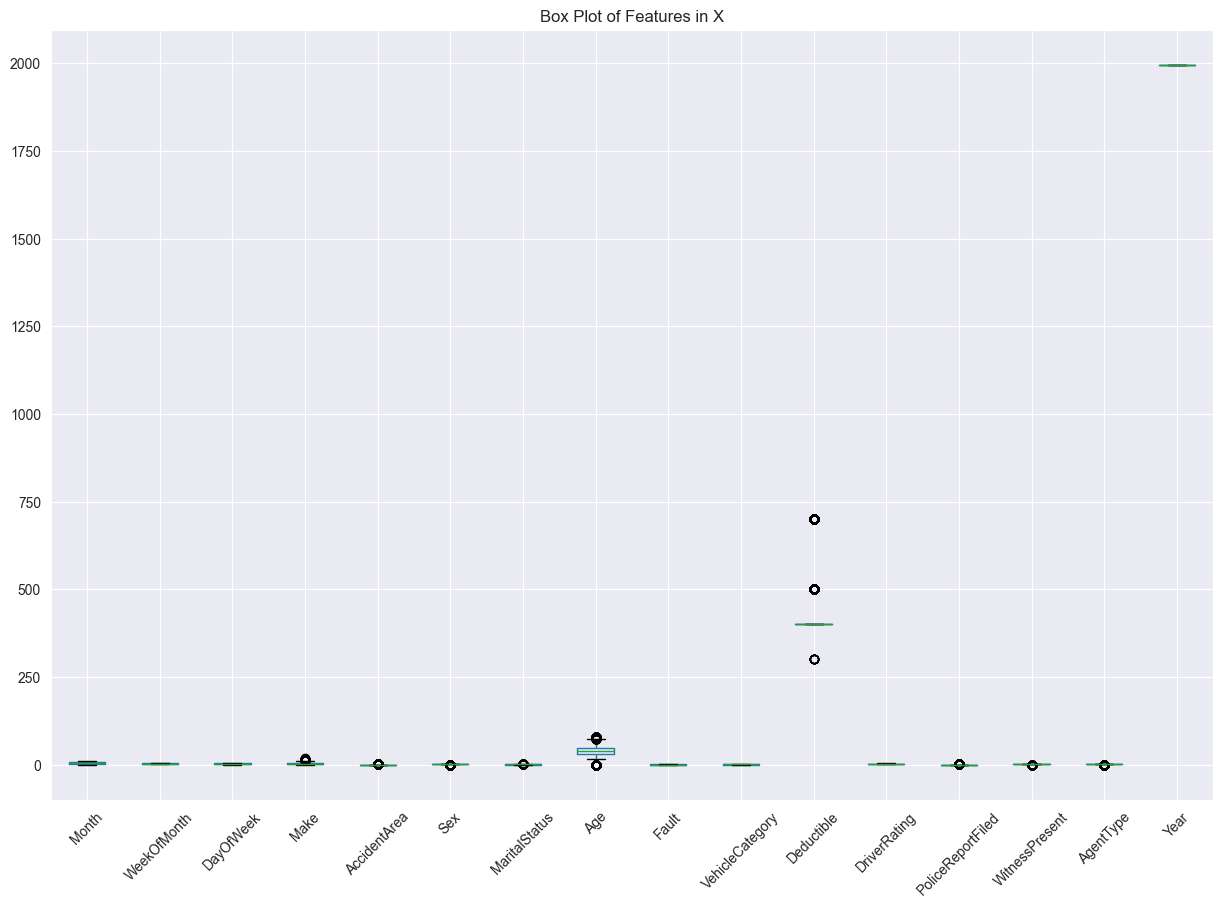

In [196]:
# Visualizing Outliers using Box Plots
plt.figure(figsize=(15, 10))
X.boxplot()
plt.xticks(rotation=45)
plt.title('Box Plot of Features in X')
plt.show()

IQR

In [197]:
# Function to detect outliers based on IQR
def detect_outliers(df):
    outlier_indices_iqr = []

    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outlier_list_col = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)].index
        outlier_indices_iqr.extend(outlier_list_col)

    outlier_indices_iqr = list(set(outlier_indices_iqr))
    return outlier_indices_iqr

# Detect outliers
outliers_iqr = detect_outliers(X)

# Print information about outliers
print(f"Number of Outliers Detected: {len(outliers_iqr)}")
print("Outliers Indices:", outliers_iqr)

Number of Outliers Detected: 5371
Outliers Indices: [0, 1, 3, 4, 7, 8, 13, 17, 24, 28, 29, 30, 31, 40, 42, 45, 46, 48, 51, 52, 58, 59, 62, 72, 77, 78, 79, 83, 84, 85, 88, 90, 93, 101, 102, 113, 116, 119, 120, 121, 125, 126, 128, 142, 144, 147, 150, 153, 154, 161, 162, 164, 167, 168, 174, 176, 177, 179, 180, 184, 186, 193, 198, 202, 203, 204, 209, 211, 214, 216, 217, 226, 227, 228, 236, 241, 242, 243, 245, 247, 248, 255, 257, 264, 267, 268, 270, 272, 273, 277, 278, 279, 280, 282, 286, 287, 291, 292, 294, 295, 301, 303, 304, 306, 307, 308, 309, 312, 314, 315, 317, 319, 321, 325, 326, 331, 335, 341, 346, 347, 348, 352, 353, 356, 357, 362, 364, 368, 372, 375, 377, 381, 382, 387, 388, 391, 400, 403, 404, 407, 408, 411, 412, 419, 420, 421, 426, 428, 431, 432, 433, 434, 435, 441, 442, 445, 447, 449, 451, 459, 460, 461, 464, 465, 480, 481, 485, 487, 488, 492, 493, 496, 503, 508, 509, 511, 512, 517, 519, 521, 524, 528, 534, 537, 540, 542, 549, 551, 553, 558, 559, 560, 561, 565, 567, 568, 570, 5

In [199]:
# Remove outliers from the DataFrame
X_cleaned_outliers_iqr = X.drop(outliers_iqr)

# If you also need to remove the corresponding rows from the target variable 'y'
y_cleaned_outliers_iqr = y.drop(outliers_iqr)

# Check the shape of the cleaned DataFrame
print("Shape of X after removing outliers:", X_cleaned_outliers_iqr.shape)
print("Shape of y after removing outliers:", y_cleaned_outliers_iqr.shape)

Shape of X after removing outliers: (10049, 16)
Shape of y after removing outliers: (10049,)


COMPARING THE ORIGINAL y WITH THE y_cleaned_outliers_iqr AFTER OUTLINERS REMOVED


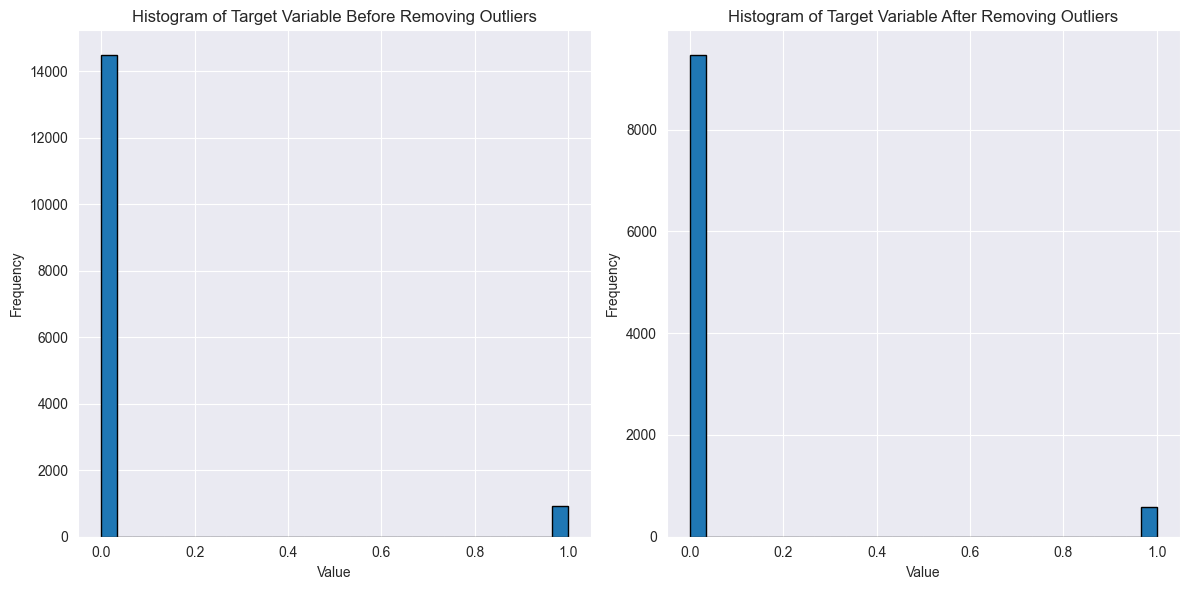

In [200]:
import matplotlib.pyplot as plt

# Histogram before removing outliers in y
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.hist(y, bins=30, edgecolor='black')
plt.title('Histogram of Target Variable Before Removing Outliers')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Histogram after removing outliers in y
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.hist(y_cleaned_outliers_iqr, bins=30, edgecolor='black')
plt.title('Histogram of Target Variable After Removing Outliers')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

COMPARING THE ORIGINAL X WITH THE X_cleaned_outliers_iqr AFTER OUTLINERS REMOVED


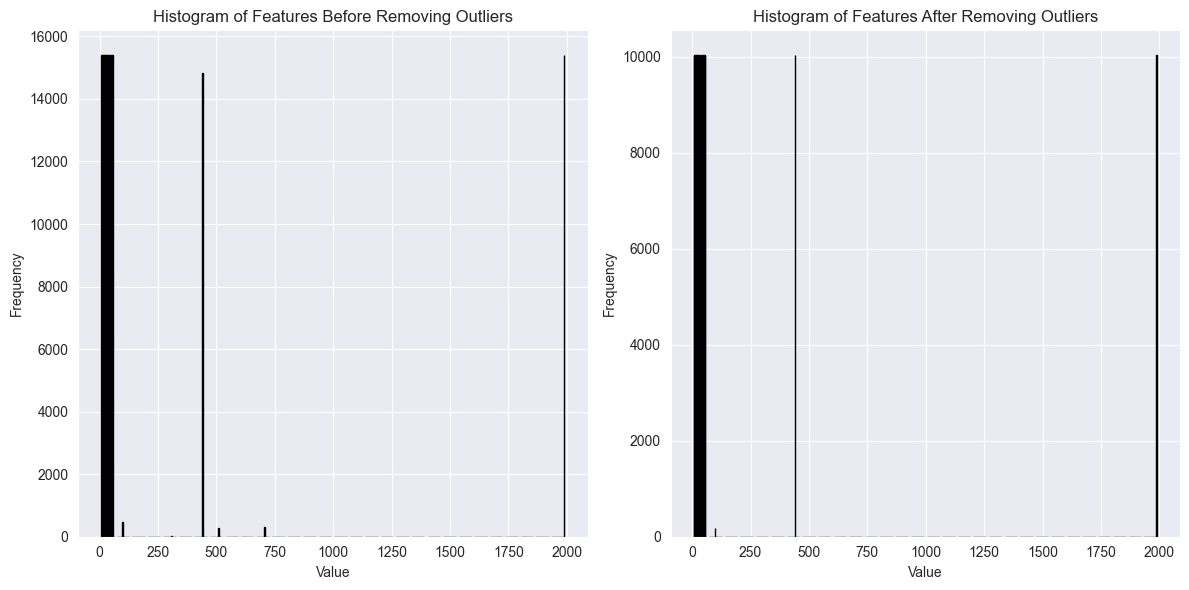

In [201]:
import matplotlib.pyplot as plt

# Histogram before removing outliers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.hist(X, bins=30, edgecolor='black')
plt.title('Histogram of Features Before Removing Outliers')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Histogram after removing outliers
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.hist(X_cleaned_outliers_iqr, bins=30, edgecolor='black')
plt.title('Histogram of Features After Removing Outliers')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

CORRELATION AFTER IQR OUTLINERS REMOVED


Correlation of numerical features with (After Removing Outliers):
VehicleCategory      0.120528
Month                0.023858
DriverRating         0.006057
MaritalStatus       -0.001450
Year                -0.004269
WeekOfMonth         -0.006385
Make                -0.009497
DayOfWeek           -0.009896
Age                 -0.016645
Fault               -0.152543
AccidentArea              NaN
Sex                       NaN
Deductible                NaN
PoliceReportFiled         NaN
WitnessPresent            NaN
AgentType                 NaN
dtype: float64


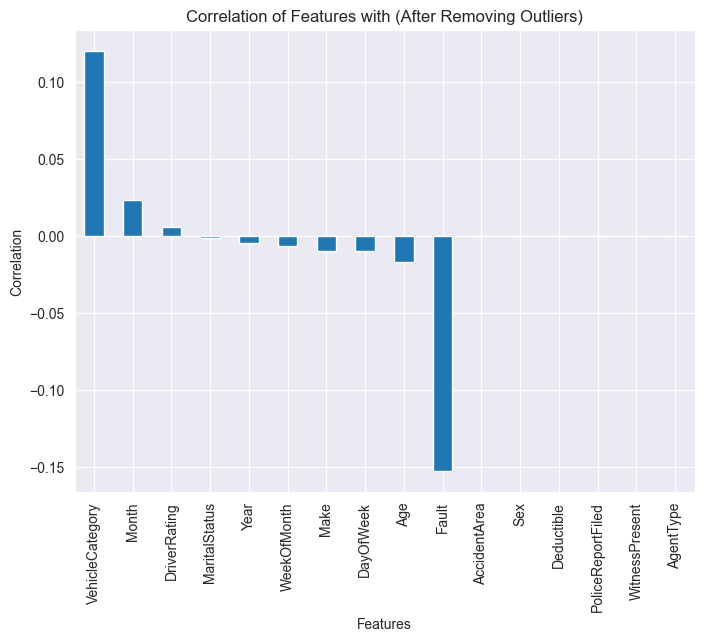

In [204]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# For numerical features, we can calculate the correlation with the target
correlations_cleaned = X_cleaned_outliers_iqr.corrwith(y_cleaned_outliers_iqr).sort_values(ascending=False)
print("Correlation of numerical features with (After Removing Outliers):")
print(correlations_cleaned)

# Plot correlation with the target variable
plt.figure(figsize=(8, 6))
correlations_cleaned.plot(kind='bar')
plt.title('Correlation of Features with (After Removing Outliers)')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.show()



CORRELATION MATRIX FOR THE IQR OUTLINERS AFTER CLEANING


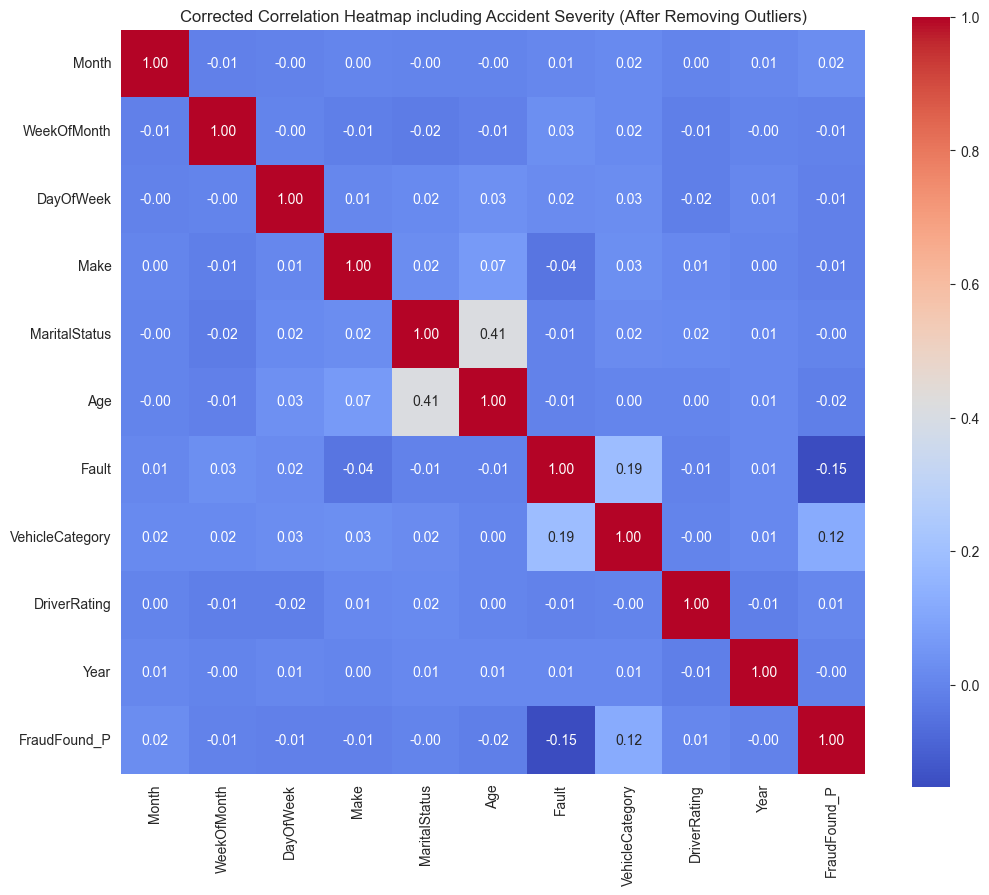

In [210]:
# Add the cleaned target variable back to X_cleaned for the purpose of finding correlations
X_with_target_cleaned = X_cleaned_outliers_iqr.copy()
X_with_target_cleaned['FraudFound_P'] = y_cleaned_outliers_iqr

# Calculate the correlation matrix including the cleaned target variable
correlation_matrix_cleaned = X_with_target_cleaned.corr()

# Remove columns and rows with NaN values from the correlation matrix
correlation_matrix_cleaned = correlation_matrix_cleaned.dropna(axis=0, how='all').dropna(axis=1, how='all')


# Create the heatmap using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_cleaned, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Corrected Correlation Heatmap including Accident Severity (After Removing Outliers)')
plt.show()



Distribution of Numerical Features in X_with_target_cleaned:


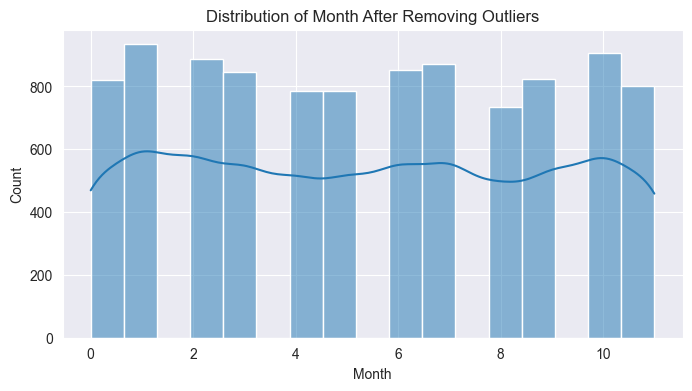

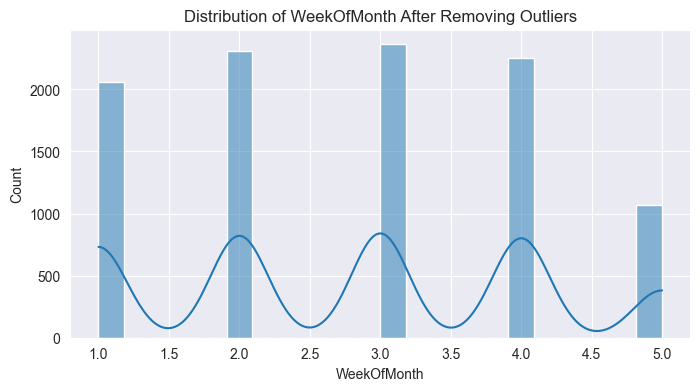

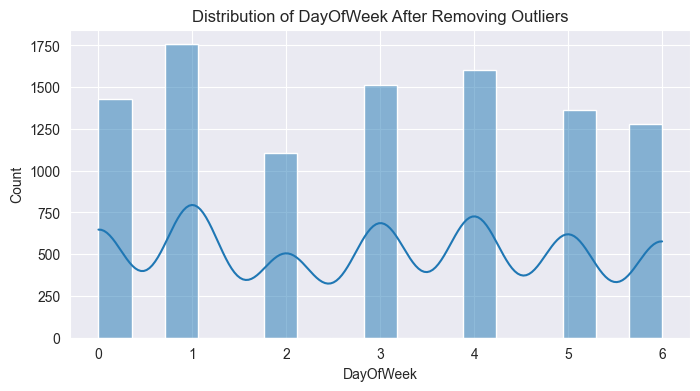

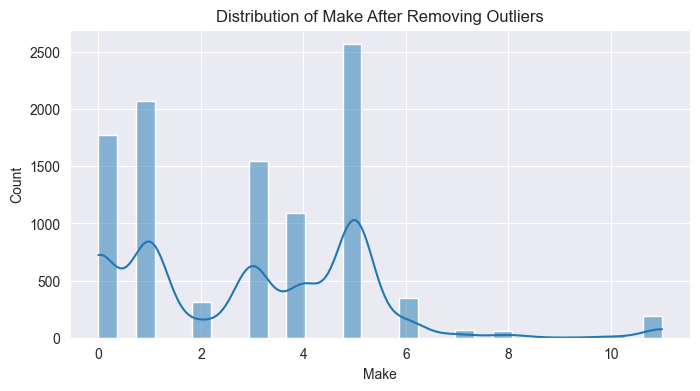

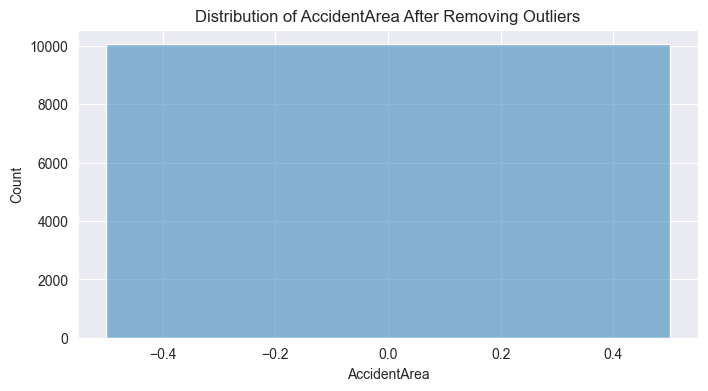

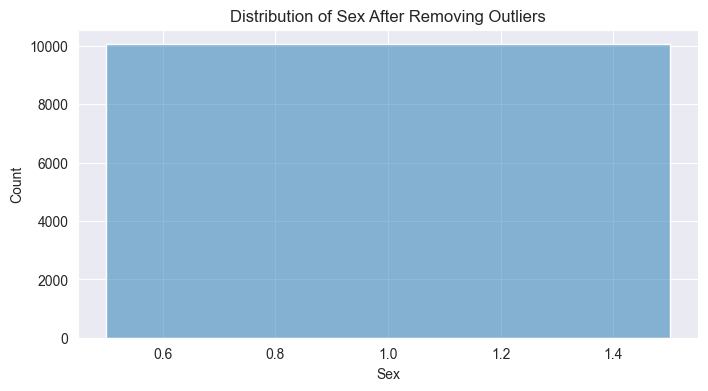

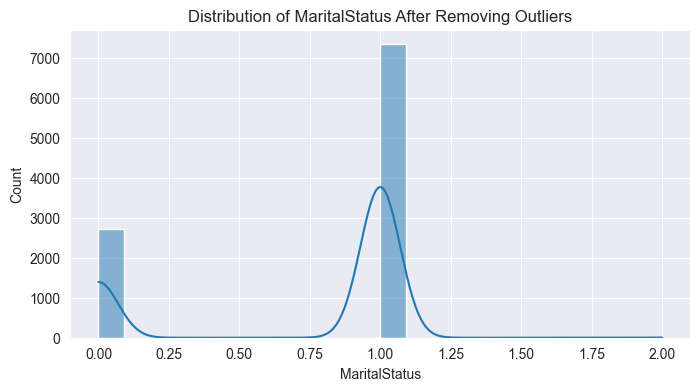

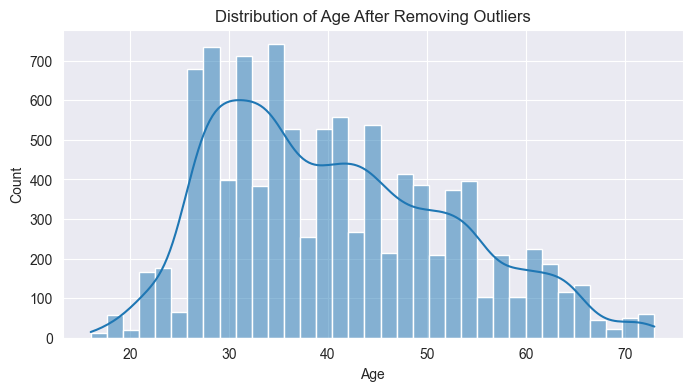

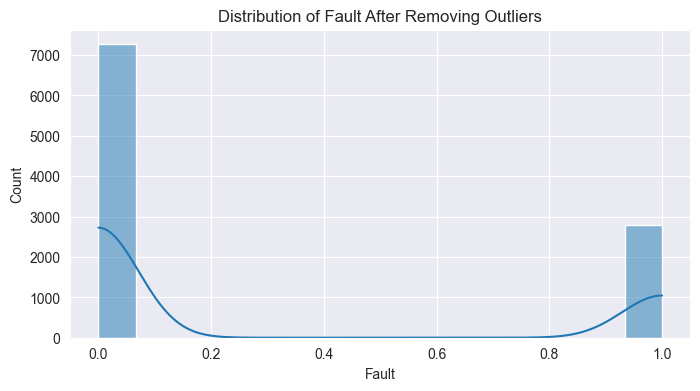

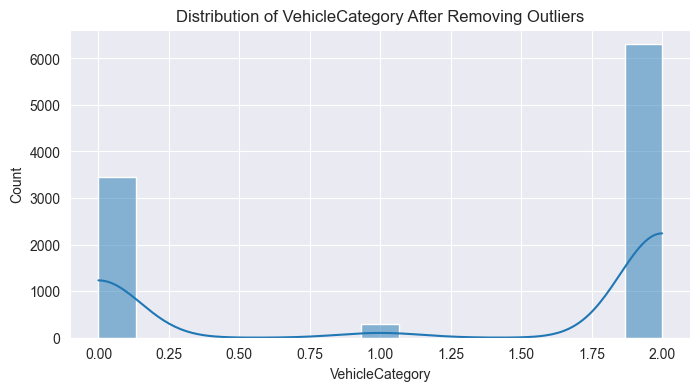

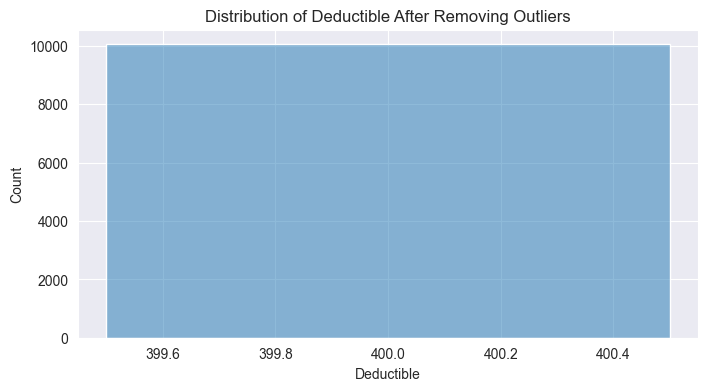

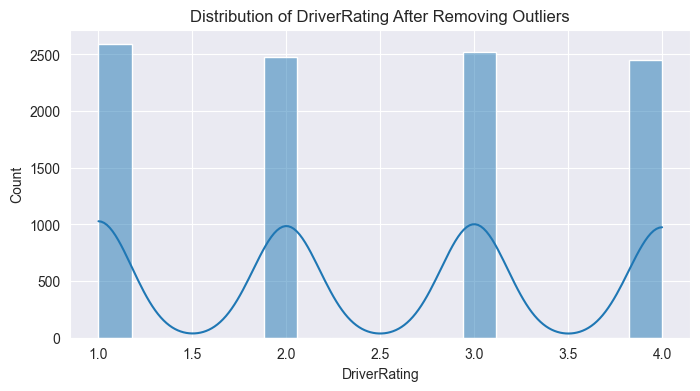

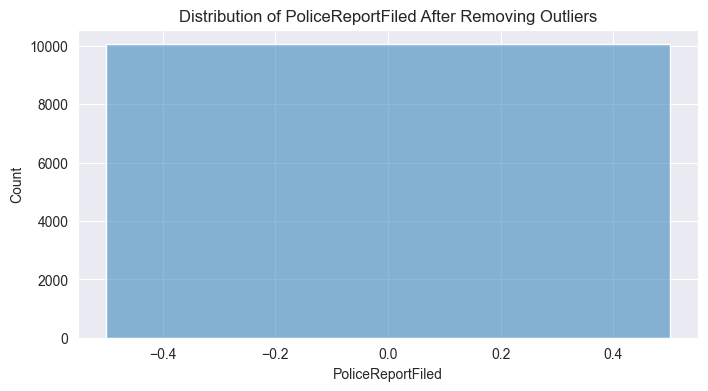

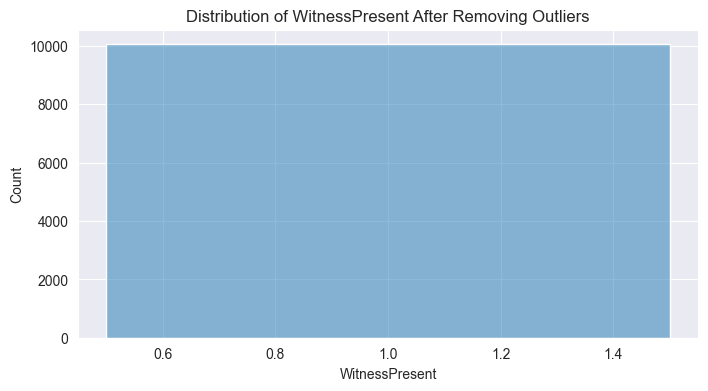

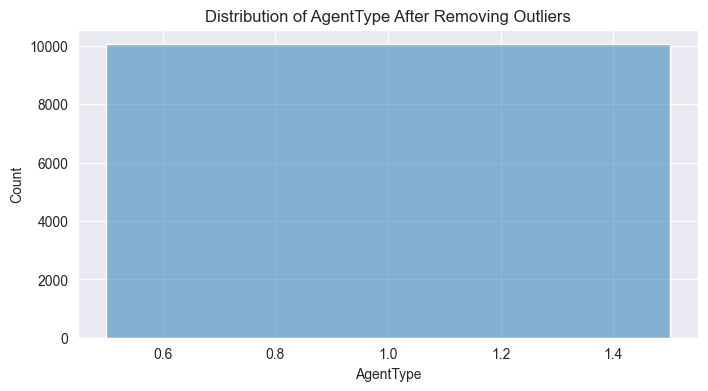

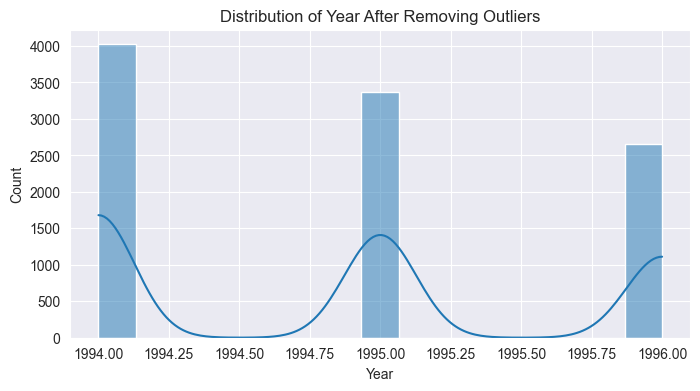

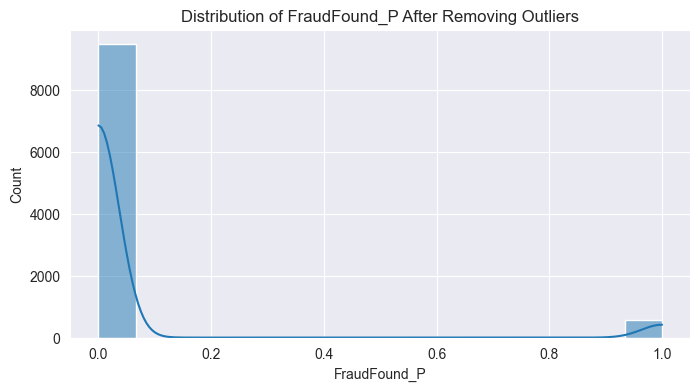

In [211]:
# Distribution of numerical features in X_cleaned (after removing outliers)
print("\nDistribution of Numerical Features in X_with_target_cleaned:")
for column in X_with_target_cleaned.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(X_with_target_cleaned[column], kde=True)
    plt.title(f'Distribution of {column} After Removing Outliers')
    plt.show()


Relationship Between Features and Target Variable After Removing Outliers:


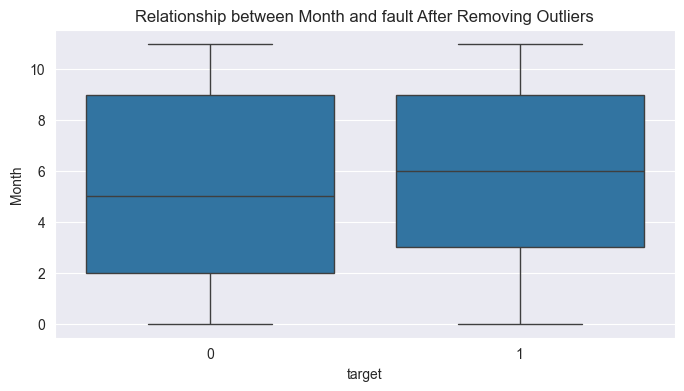

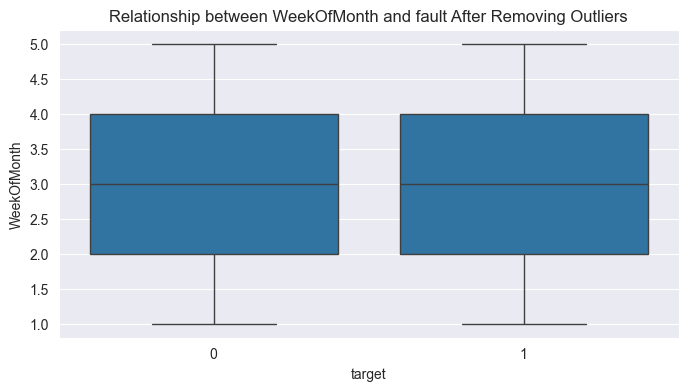

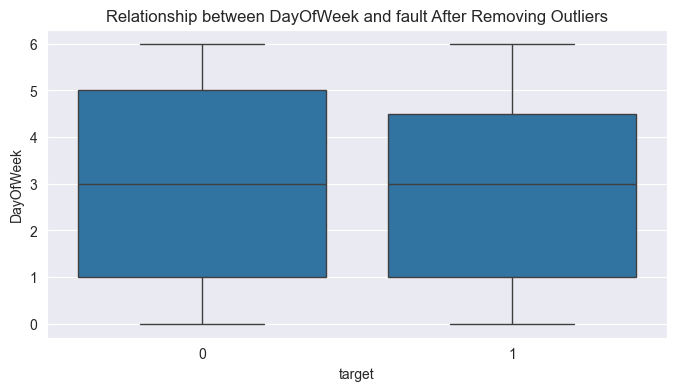

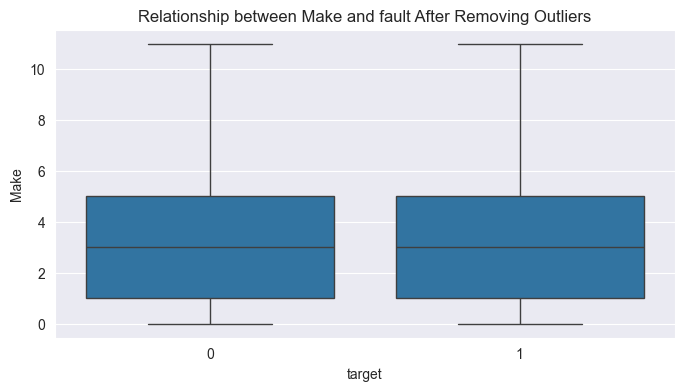

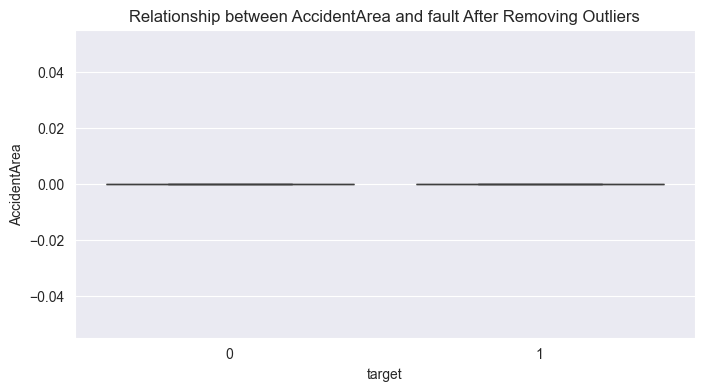

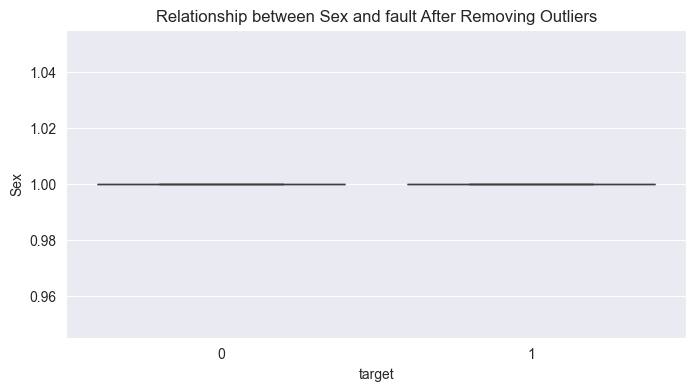

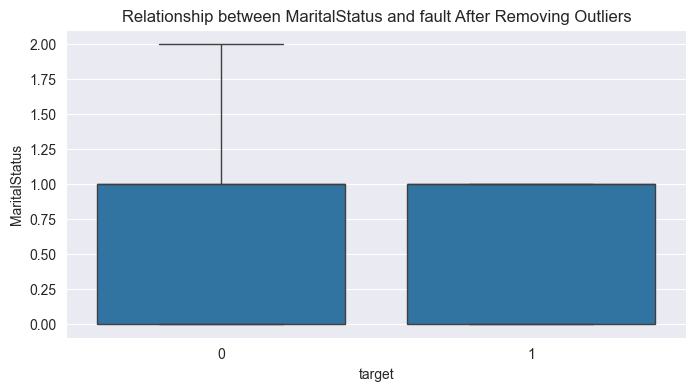

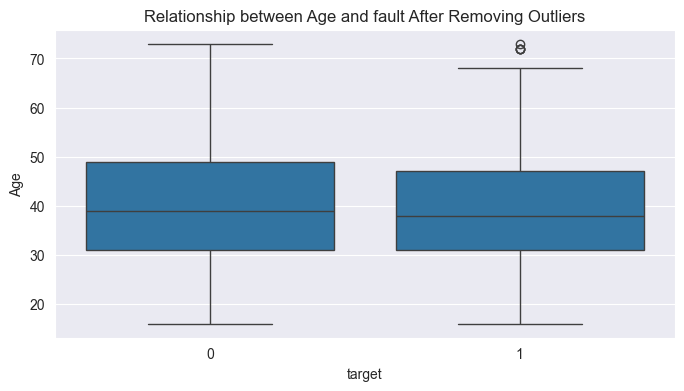

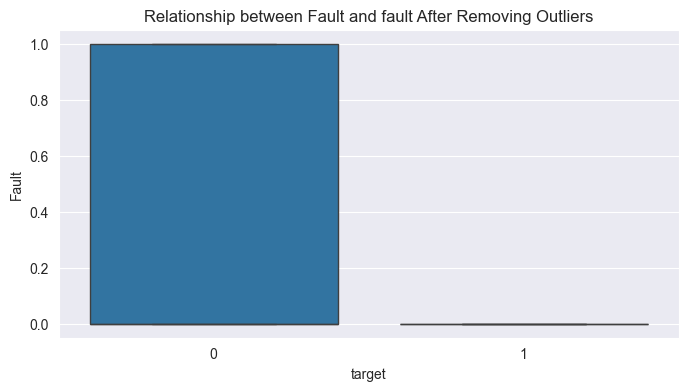

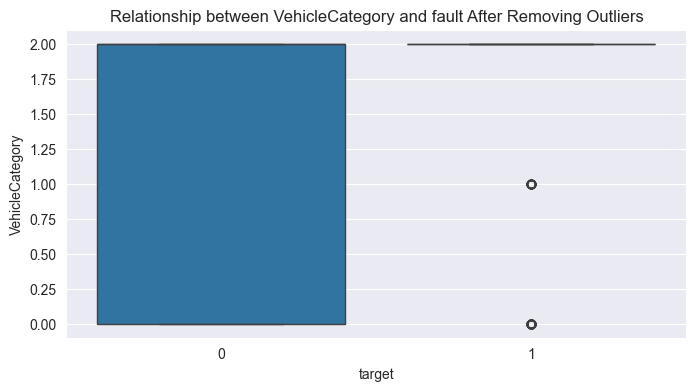

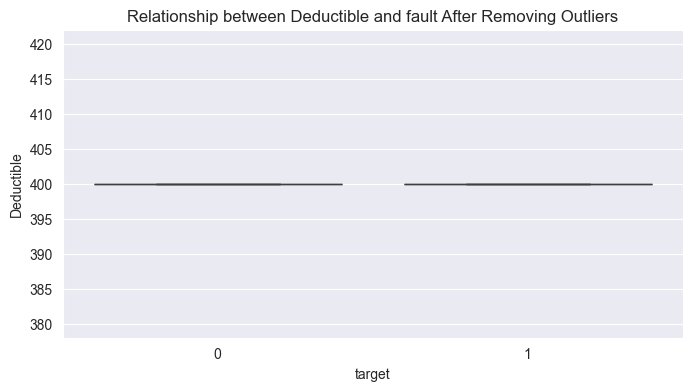

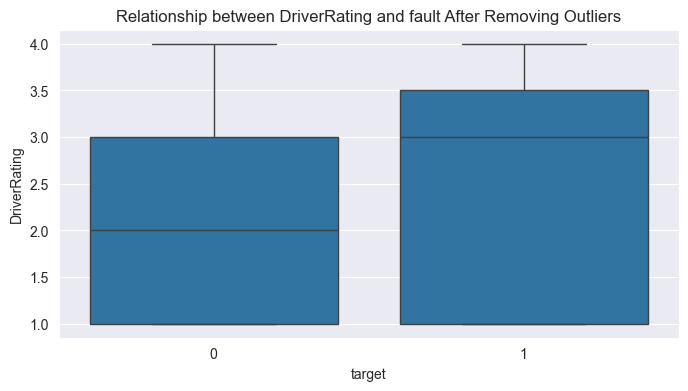

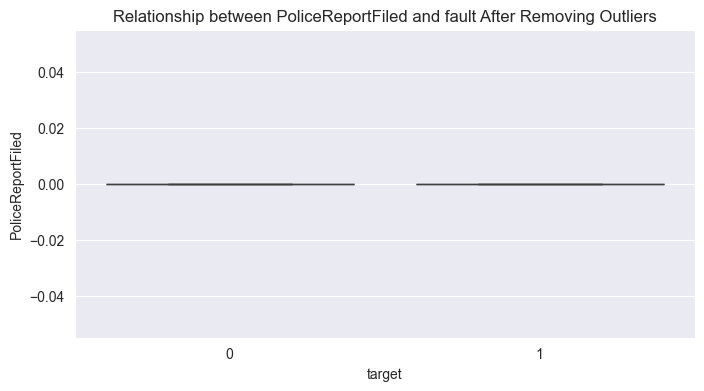

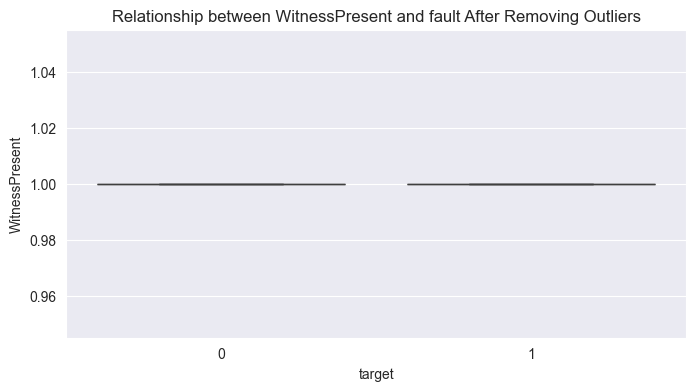

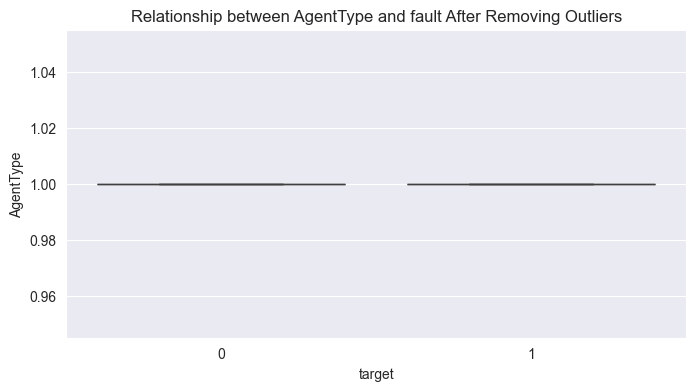

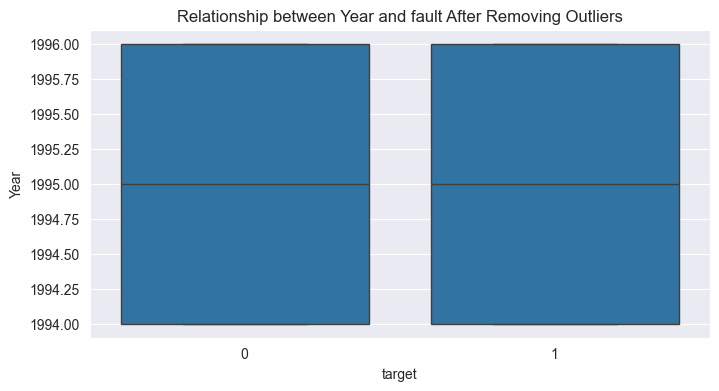

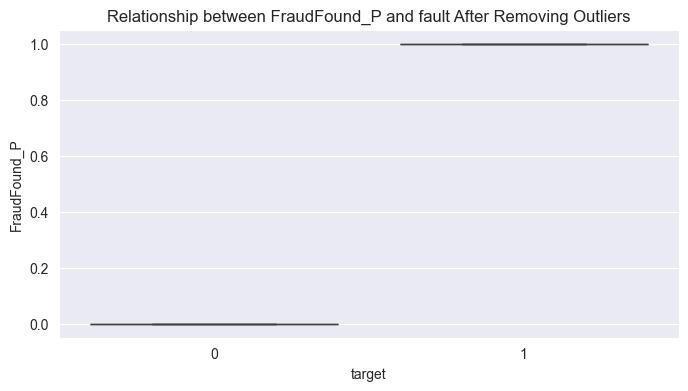

In [212]:
# Analyzing the relationship between each feature in X_with_target_cleaned and the target variable y_cleaned
print("\nRelationship Between Features and Target Variable After Removing Outliers:")
for column in X_with_target_cleaned.columns:
    if X_with_target_cleaned[column].dtype in ['int64', 'float64']:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=y_cleaned_outliers_iqr, y=X_with_target_cleaned[column])
        plt.title(f'Relationship between {column} and fault After Removing Outliers')
        plt.show()

CLUSTERS AFTER IQR REMOVED


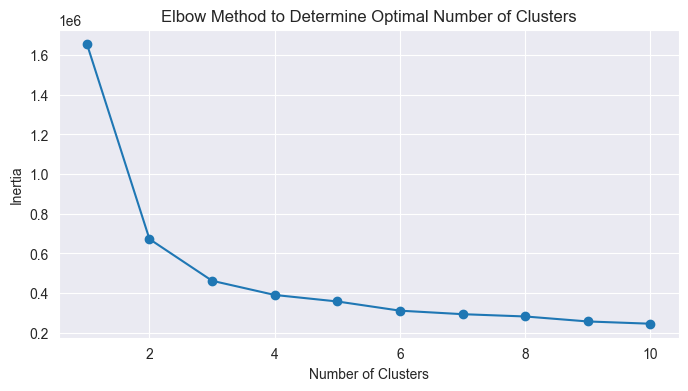

In [213]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Determine the optimal number of clusters using the Elbow Method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_cleaned_outliers_iqr)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
clusters = kmeans.fit_predict(X_cleaned_outliers_iqr)

# Add the cluster labels to your dataset
X_with_clusters = X_cleaned_outliers_iqr.copy()
X_with_clusters['Cluster'] = clusters

In [214]:
# Check the shape of the cleaned DataFrame
print("Shape of X after removing outliers:", X_cleaned_outliers_iqr.shape)
print("Shape of y after removing outliers:", y_cleaned_outliers_iqr.shape)

Shape of X after removing outliers: (10049, 16)
Shape of y after removing outliers: (10049,)


IQR-SMOTE

In [215]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Prepare the features and target variable
X = X_cleaned_outliers_iqr
y = y_cleaned_outliers_iqr

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Now, X_train_smote and y_train_smote can be used to train a machine learning model
print(X_train_smote.shape)
print(X_test_scaled.shape)
print(y_train_smote.shape)
print(y_test.shape)

(15172, 16)
(2010, 16)
(15172,)
(2010,)


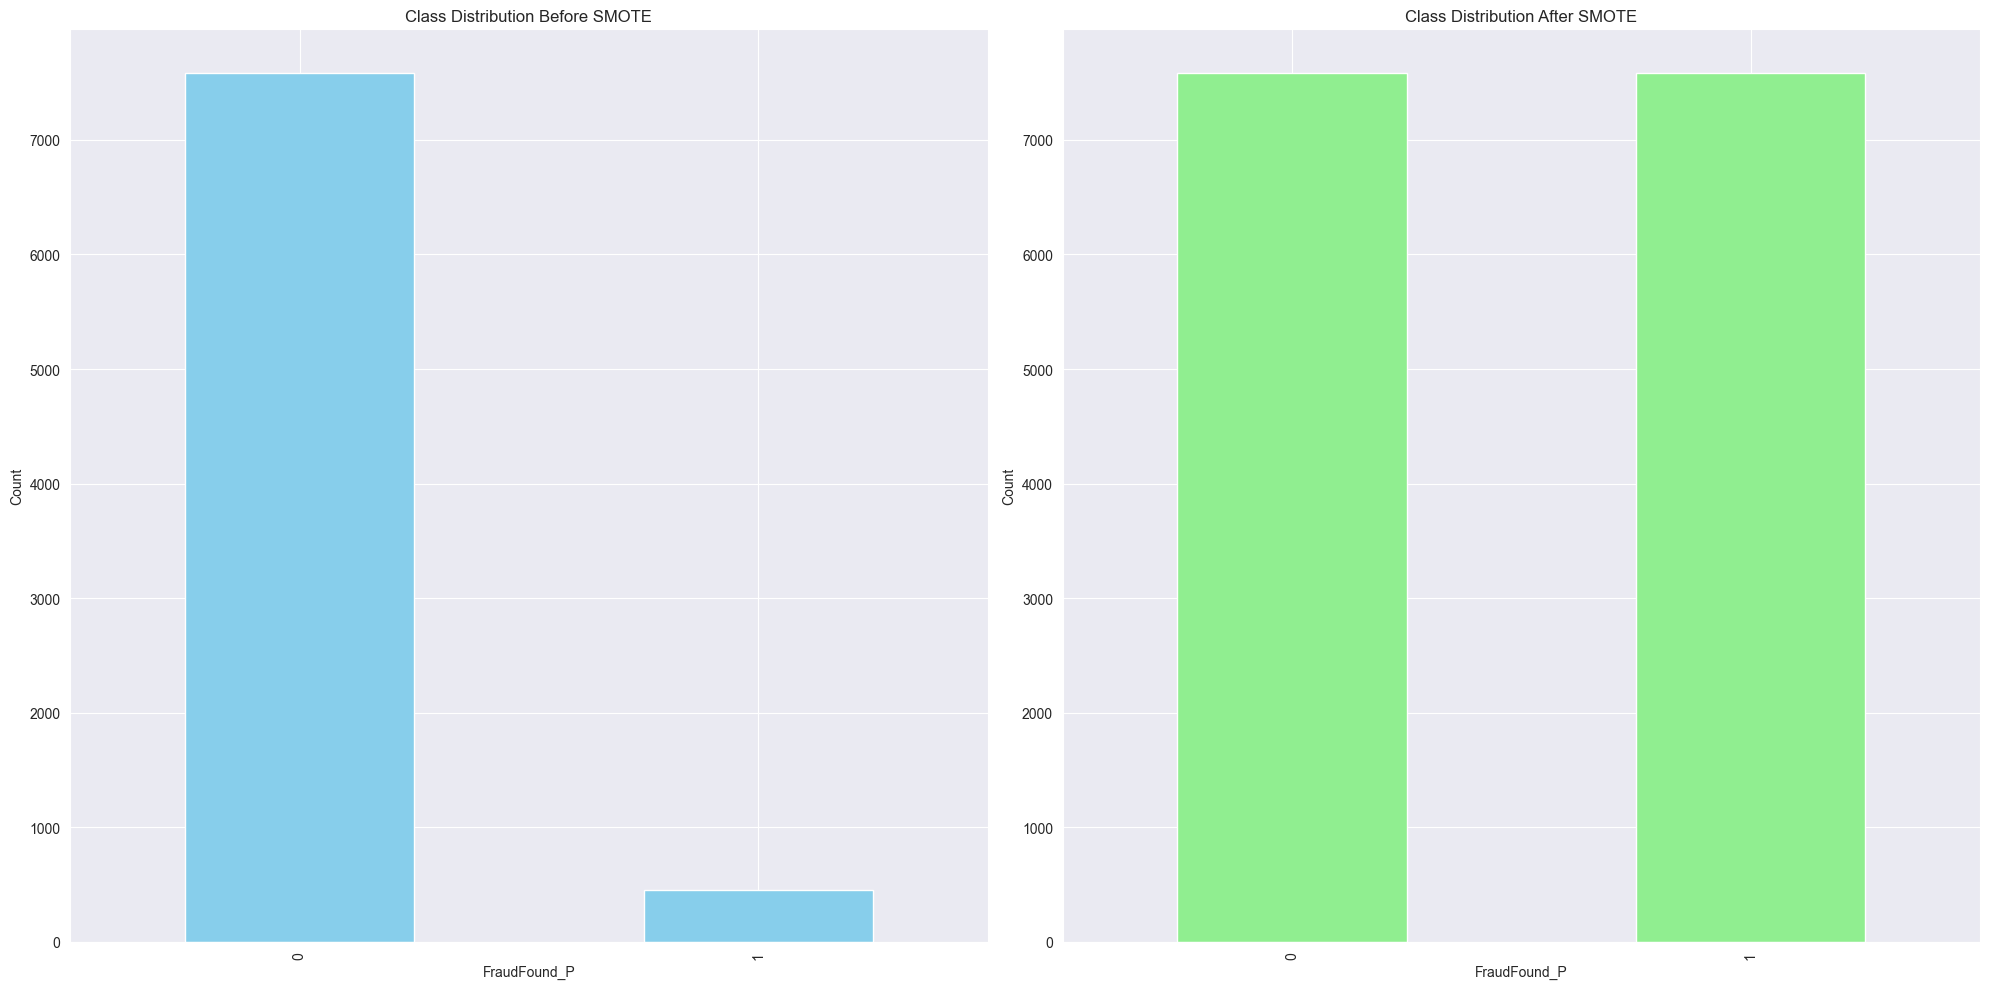

In [216]:
# Plot the class distribution before and after SMOTE
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Before SMOTE
y_train.value_counts().sort_index().plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Class Distribution Before SMOTE')
axes[0].set_xlabel('FraudFound_P')
axes[0].set_ylabel('Count')

# After SMOTE
y_train_smote.value_counts().sort_index().plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title('Class Distribution After SMOTE')
axes[1].set_xlabel('FraudFound_P')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

MODELS

Training and evaluating Logistic Regression...

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.98      0.62      0.76      1888
           1       0.12      0.84      0.22       122

    accuracy                           0.63      2010
   macro avg       0.55      0.73      0.49      2010
weighted avg       0.93      0.63      0.72      2010

Confusion Matrix:
[[1162  726]
 [  19  103]]


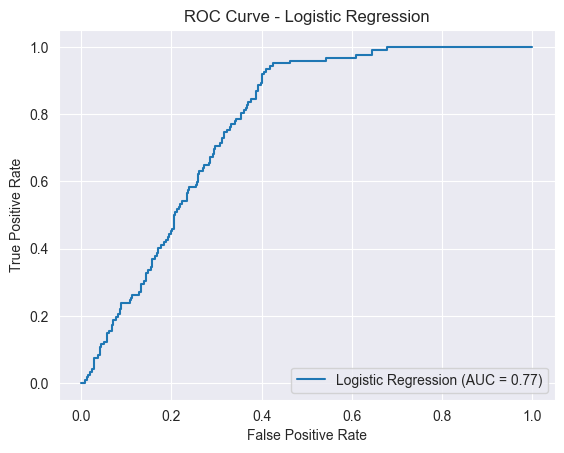

Training and evaluating Decision Tree...

Decision Tree Results:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1888
           1       0.15      0.20      0.17       122

    accuracy                           0.88      2010
   macro avg       0.55      0.56      0.55      2010
weighted avg       0.90      0.88      0.89      2010

Confusion Matrix:
[[1749  139]
 [  98   24]]


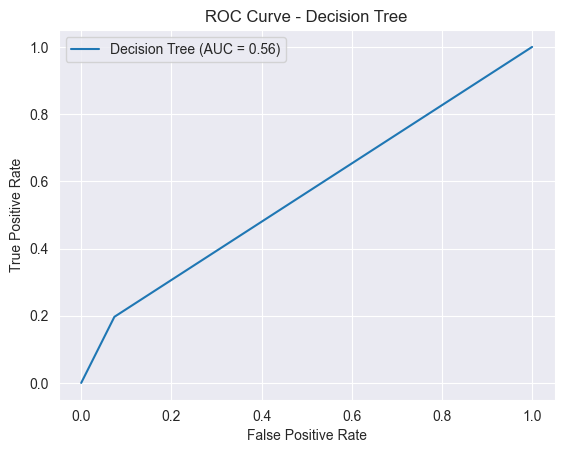

Training and evaluating Random Forest...

Random Forest Results:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1888
           1       0.19      0.02      0.04       122

    accuracy                           0.93      2010
   macro avg       0.56      0.51      0.50      2010
weighted avg       0.89      0.93      0.91      2010

Confusion Matrix:
[[1875   13]
 [ 119    3]]


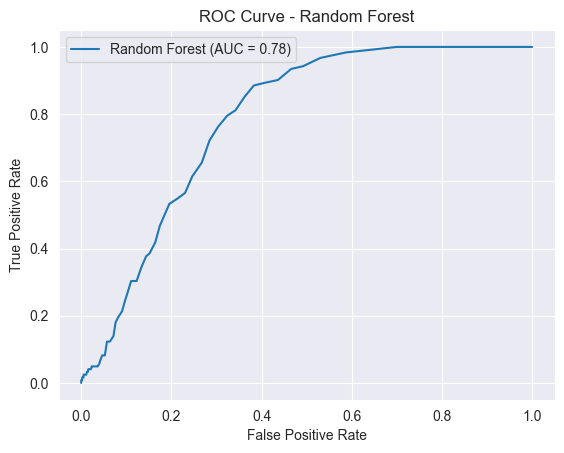

Training and evaluating SVM...

SVM Results:
              precision    recall  f1-score   support

           0       0.97      0.74      0.84      1888
           1       0.13      0.63      0.22       122

    accuracy                           0.73      2010
   macro avg       0.55      0.68      0.53      2010
weighted avg       0.92      0.73      0.80      2010

Confusion Matrix:
[[1389  499]
 [  45   77]]


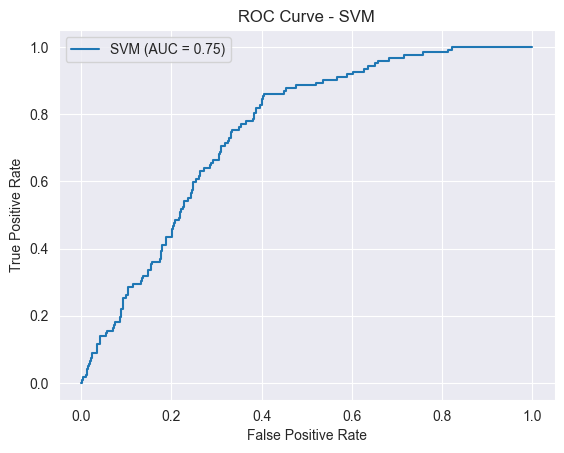

Training and evaluating KNN...

KNN Results:
              precision    recall  f1-score   support

           0       0.95      0.82      0.88      1888
           1       0.12      0.40      0.19       122

    accuracy                           0.79      2010
   macro avg       0.54      0.61      0.54      2010
weighted avg       0.90      0.79      0.84      2010

Confusion Matrix:
[[1543  345]
 [  73   49]]


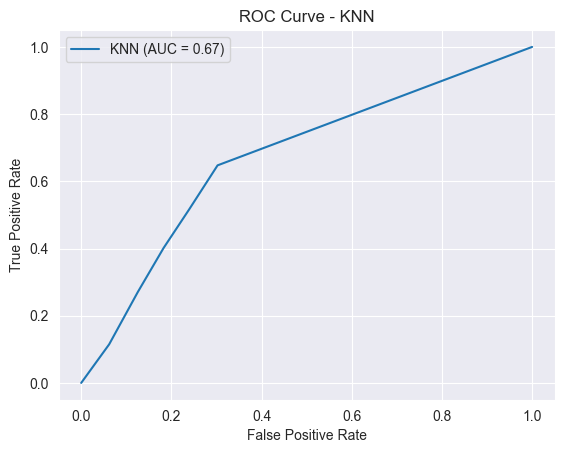

Training and evaluating Gradient Boosting...

Gradient Boosting Results:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1888
           1       0.21      0.07      0.10       122

    accuracy                           0.93      2010
   macro avg       0.58      0.52      0.53      2010
weighted avg       0.90      0.93      0.91      2010

Confusion Matrix:
[[1858   30]
 [ 114    8]]


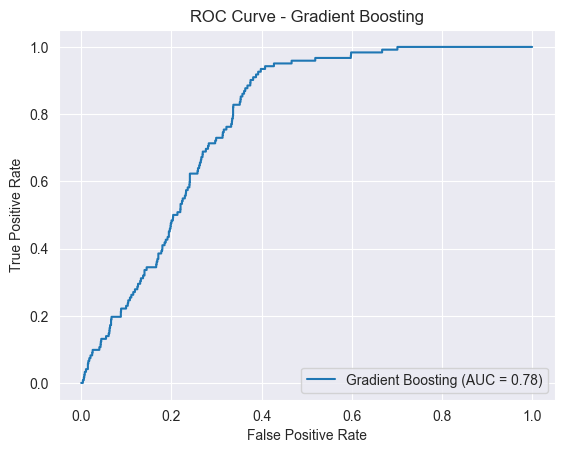

Training and evaluating XGBoost...

XGBoost Results:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1888
           1       0.24      0.05      0.08       122

    accuracy                           0.93      2010
   macro avg       0.59      0.52      0.52      2010
weighted avg       0.90      0.93      0.91      2010

Confusion Matrix:
[[1869   19]
 [ 116    6]]


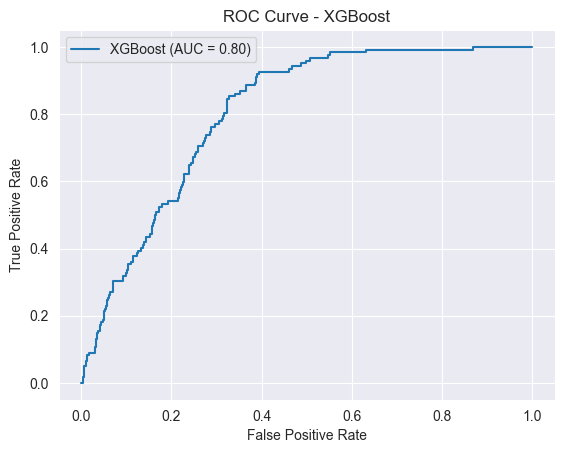


Summary of Results:
                 Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC
0  Logistic Regression  0.629353   0.124246  0.844262  0.216614  0.773188
1        Decision Tree  0.882090   0.147239  0.196721  0.168421  0.561549
2        Random Forest  0.934328   0.187500  0.024590  0.043478  0.783861
3                  SVM  0.729353   0.133681  0.631148  0.220630  0.749162
4                  KNN  0.792040   0.124365  0.401639  0.189922  0.672350
5    Gradient Boosting  0.928358   0.210526  0.065574  0.100000  0.781578
6              XGBoost  0.932836   0.240000  0.049180  0.081633  0.803609


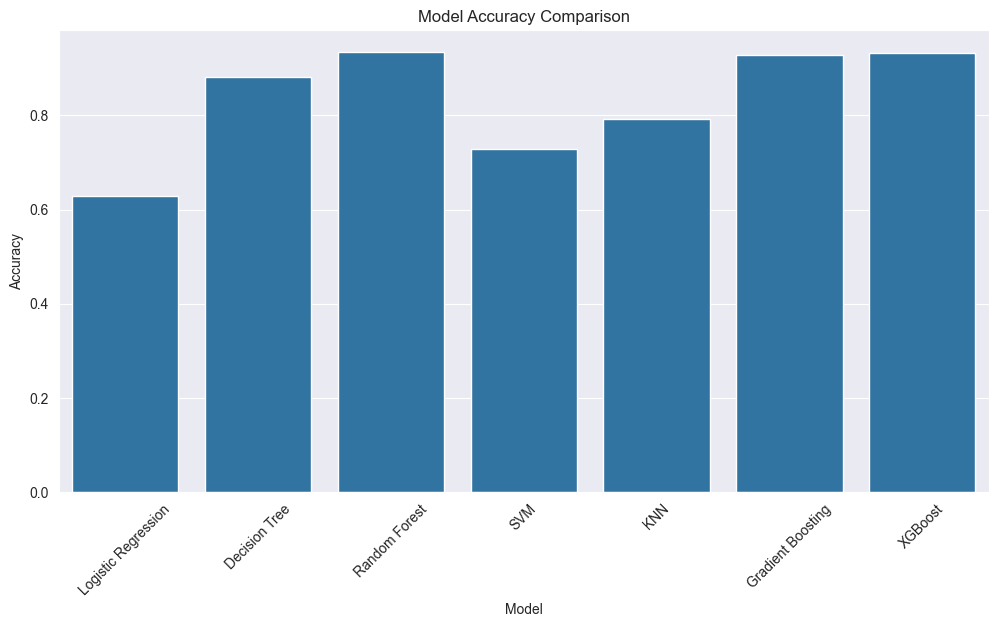

In [217]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    classification_report, confusion_matrix, roc_curve
)
import matplotlib.pyplot as plt

# List of models to evaluate
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss")
}

# Results storage
results = []

# Loop through each model
for name, model in models.items():
    print(f"Training and evaluating {name}...")

    # Train the model
    model.fit(X_train_smote, y_train_smote)

    # Predictions
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else None

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else "N/A"
    results.append((name, accuracy, precision, recall, f1, roc_auc))

    # Print detailed results
    print(f"\n{name} Results:")
    print(classification_report(y_test, y_pred))
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")

    # Plot ROC curve if available
    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.figure()
        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")
        plt.title(f"ROC Curve - {name}")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend()
        plt.show()

# Summary of results
results_df = pd.DataFrame(
    results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "ROC-AUC"]
)
print("\nSummary of Results:")
print(results_df)

# Display as a table if running in Jupyter Notebook
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.barplot(x="Model", y="Accuracy", data=results_df)
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=45)
plt.show()
